# Project Description

Your client is a retail banking institution. Term deposits are a major source of income for a bank. A term deposit is a cash investment held at a financial institution. Your money is invested for an agreed rate of interest over a fixed amount of time, or term. The bank has various outreach plans to sell term deposits to their customers such as email marketing, advertisements, telephonic marketing and digital marketing. Telephonic marketing campaigns still remain one of the most effective way to reach out to people. However, they require huge investment as large call centers are hired to actually execute these campaigns. Hence, it is crucial to identify the customers most likely to convert beforehand so that they can be specifically targeted via call.
You are provided with the client data such as : age of the client, their job type, their marital status, etc. Along with the client data, you are also provided with the information of the call such as the duration of the call, day and month of the call, etc. Given this information, your task is to predict if the client will subscribe to term deposit.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('C:\\Users\\Oscar Jacob\\termdeposit_train.csv')
data

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


# Dataset Attributes
Here is the description of all the variables:

•	Variable: Definition

•	ID: Unique client ID

•	age: Age of the client

•	job: Type of job

•	marital: Marital status of the client

•	education: Education level

•	default: Credit in default.

•	housing: Housing loan

•	loan: Personal loan

•	contact: Type of communication

•	month: Contact month

•	day_of_week: Day of week of contact

•	duration: Contact duration

•	campaign: number of contacts performed during this campaign to the client

•	pdays: number of days that passed by after the client was last contacted

•	previous: number of contacts performed before this campaign

•	poutcome: outcome of the previous marketing campaign

Output variable (desired target):

•	Subscribed (target): has the client subscribed a term deposit? (YES/NO)


In [3]:
data.shape

(31647, 18)

dataset has 31647 rows and 18columns

In [4]:
data.head(10)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
5,29390,33,management,single,tertiary,no,0,yes,no,cellular,2,feb,116,3,-1,0,unknown,no
6,40444,56,retired,married,secondary,no,1044,no,no,telephone,3,jul,353,2,-1,0,unknown,yes
7,40194,50,technician,single,secondary,no,1811,no,no,cellular,8,jun,97,4,-1,0,unknown,no
8,29824,45,blue-collar,divorced,secondary,no,1951,yes,no,cellular,4,feb,692,1,-1,0,unknown,no
9,44676,35,admin.,married,secondary,no,1204,no,no,cellular,3,sep,789,2,-1,0,unknown,no


In [5]:
data.tail(10)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
31637,20110,44,technician,married,secondary,no,5163,no,no,cellular,11,aug,48,2,-1,0,unknown,no
31638,16309,29,blue-collar,married,secondary,no,721,yes,no,cellular,23,jul,644,1,-1,0,unknown,no
31639,279,38,services,single,secondary,no,570,yes,no,unknown,5,may,75,2,-1,0,unknown,no
31640,12109,43,management,single,secondary,no,2968,no,no,unknown,20,jun,30,4,-1,0,unknown,no
31641,9476,37,technician,single,tertiary,no,1309,no,no,unknown,6,jun,442,2,-1,0,unknown,no
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no
31646,14156,55,management,divorced,secondary,no,204,yes,no,cellular,11,jul,1973,2,-1,0,unknown,yes


In [6]:
data.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [7]:
#checking value count of each column
for i in data.columns:
    print(data[i].value_counts())
    print('\n')

26110    1
13339    1
39681    1
15135    1
26037    1
        ..
1247     1
15584    1
25376    1
38699    1
14156    1
Name: ID, Length: 31647, dtype: int64


32    1457
31    1417
33    1406
34    1321
35    1314
      ... 
92       1
95       1
93       1
94       1
90       1
Name: age, Length: 76, dtype: int64


blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64


married     19095
single       8922
divorced     3630
Name: marital, dtype: int64


secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: education, dtype: int64


no     31062
yes      585
Name: default, dtype: int64


 0        2470
 1         137
 2         109
 4          95
 3          88
          ... 
 15120       1
-713         1
-905         1
 4722  

In [8]:
data.drop(columns = ['ID', 'education', 'balance', 'contact','pdays'],inplace = True)
data

,age,job,marital,default,housing,loan,day,month,duration,campaign,previous,poutcome,subscribed
0,56,admin.,married,no,no,no,19,nov,44,2,0,unknown,no
1,31,unknown,married,no,no,no,20,jul,91,2,0,unknown,no
2,27,services,married,no,yes,no,18,jul,240,1,0,unknown,no
3,57,management,divorced,no,no,no,22,jun,867,1,3,success,yes
4,31,technician,married,no,yes,no,4,feb,380,1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,29,management,single,no,yes,no,12,may,116,2,0,unknown,no
31643,53,management,divorced,no,no,yes,5,jun,438,2,0,unknown,yes
31644,32,management,single,no,no,no,7,aug,37,3,0,unknown,no
31645,57,technician,married,no,yes,no,15,may,22,7,12,failure,no


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   age         31647 non-null  int64 
 1   job         31647 non-null  object
 2   marital     31647 non-null  object
 3   default     31647 non-null  object
 4   housing     31647 non-null  object
 5   loan        31647 non-null  object
 6   day         31647 non-null  int64 
 7   month       31647 non-null  object
 8   duration    31647 non-null  int64 
 9   campaign    31647 non-null  int64 
 10  previous    31647 non-null  int64 
 11  poutcome    31647 non-null  object
 12  subscribed  31647 non-null  object
dtypes: int64(5), object(8)
memory usage: 3.1+ MB


In [10]:
data.dtypes

age            int64
job           object
marital       object
default       object
housing       object
loan          object
day            int64
month         object
duration       int64
campaign       int64
previous       int64
poutcome      object
subscribed    object
dtype: object

In [11]:
data.head(10)

,age,job,marital,default,housing,loan,day,month,duration,campaign,previous,poutcome,subscribed
0,56,admin.,married,no,no,no,19,nov,44,2,0,unknown,no
1,31,unknown,married,no,no,no,20,jul,91,2,0,unknown,no
2,27,services,married,no,yes,no,18,jul,240,1,0,unknown,no
3,57,management,divorced,no,no,no,22,jun,867,1,3,success,yes
4,31,technician,married,no,yes,no,4,feb,380,1,0,unknown,no
5,33,management,single,no,yes,no,2,feb,116,3,0,unknown,no
6,56,retired,married,no,no,no,3,jul,353,2,0,unknown,yes
7,50,technician,single,no,no,no,8,jun,97,4,0,unknown,no
8,45,blue-collar,divorced,no,yes,no,4,feb,692,1,0,unknown,no
9,35,admin.,married,no,no,no,3,sep,789,2,0,unknown,no


# Observations :

1. 5 int64 columns and 8 object type column


In [12]:
data.isnull().sum()

age           0
job           0
marital       0
default       0
housing       0
loan          0
day           0
month         0
duration      0
campaign      0
previous      0
poutcome      0
subscribed    0
dtype: int64

<AxesSubplot:>

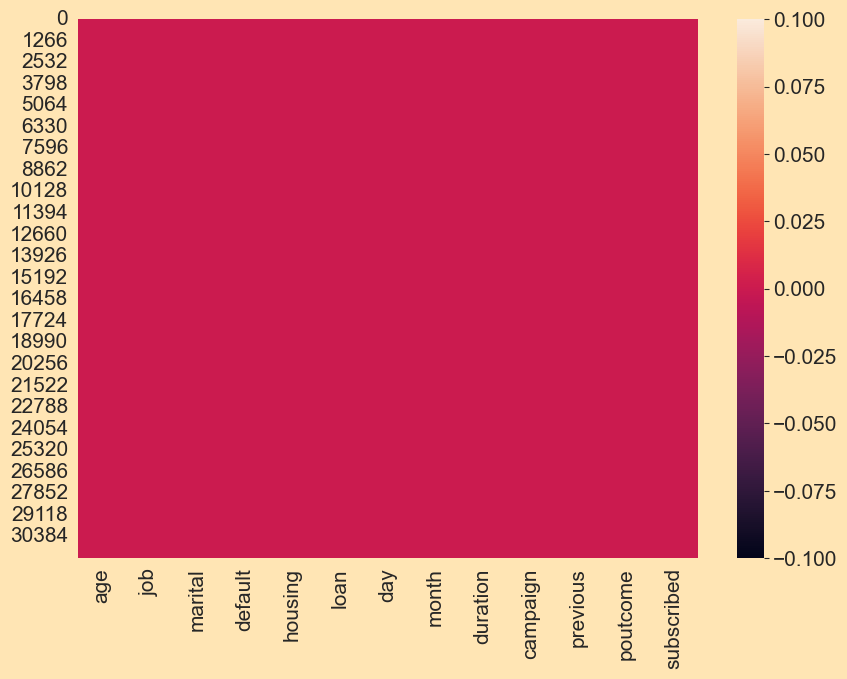

In [13]:
sns.set_style('darkgrid')
plt.rcParams['font.size']= 15
plt.rcParams['figure.figsize'] = (10,7)
plt.rcParams['figure.facecolor'] = '#FFE5B4'
sns.heatmap(data.isnull())

No nulls present

In [14]:
data.duplicated().sum()

5

5 duplicates present

In [15]:
#removing duplicates

data.drop_duplicates(inplace= True)
data.duplicated().sum()

0

# Encoding data for analysis

In [16]:
data.head(5)

,age,job,marital,default,housing,loan,day,month,duration,campaign,previous,poutcome,subscribed
0,56,admin.,married,no,no,no,19,nov,44,2,0,unknown,no
1,31,unknown,married,no,no,no,20,jul,91,2,0,unknown,no
2,27,services,married,no,yes,no,18,jul,240,1,0,unknown,no
3,57,management,divorced,no,no,no,22,jun,867,1,3,success,yes
4,31,technician,married,no,yes,no,4,feb,380,1,0,unknown,no


In [17]:
from sklearn.preprocessing import LabelEncoder

lab_enc = LabelEncoder()

for col in ['job', 'marital', 'default', 'housing', 'loan', 'poutcome', 'subscribed']:
    data[col] = lab_enc.fit_transform(data[col])

In [18]:
data

,age,job,marital,default,housing,loan,day,month,duration,campaign,previous,poutcome,subscribed
0,56,0,1,0,0,0,19,nov,44,2,0,3,0
1,31,11,1,0,0,0,20,jul,91,2,0,3,0
2,27,7,1,0,1,0,18,jul,240,1,0,3,0
3,57,4,0,0,0,0,22,jun,867,1,3,2,1
4,31,9,1,0,1,0,4,feb,380,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,29,4,2,0,1,0,12,may,116,2,0,3,0
31643,53,4,0,0,0,1,5,jun,438,2,0,3,1
31644,32,4,2,0,0,0,7,aug,37,3,0,3,0
31645,57,9,1,0,1,0,15,may,22,7,12,0,0


In [19]:
#converting datatype of month column  - %b for abbreviated form
data['month'] = pd.to_datetime(data['month'], format= '%b')
data['month'] = data['month'].dt.month

In [20]:
data

,age,job,marital,default,housing,loan,day,month,duration,campaign,previous,poutcome,subscribed
0,56,0,1,0,0,0,19,11,44,2,0,3,0
1,31,11,1,0,0,0,20,7,91,2,0,3,0
2,27,7,1,0,1,0,18,7,240,1,0,3,0
3,57,4,0,0,0,0,22,6,867,1,3,2,1
4,31,9,1,0,1,0,4,2,380,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,29,4,2,0,1,0,12,5,116,2,0,3,0
31643,53,4,0,0,0,1,5,6,438,2,0,3,1
31644,32,4,2,0,0,0,7,8,37,3,0,3,0
31645,57,9,1,0,1,0,15,5,22,7,12,0,0


In [21]:
data.dtypes

age           int64
job           int32
marital       int32
default       int32
housing       int32
loan          int32
day           int64
month         int64
duration      int64
campaign      int64
previous      int64
poutcome      int32
subscribed    int32
dtype: object

In [22]:
for i in data.columns:
    print(data[i].value_counts())
    print('\n')

32    1456
31    1417
33    1406
34    1321
35    1313
      ... 
92       1
95       1
93       1
94       1
90       1
Name: age, Length: 76, dtype: int64


1     6839
4     6638
9     5306
0     3631
7     2903
5     1574
6     1123
2     1008
10     905
3      874
8      635
11     206
Name: job, dtype: int64


1    19092
2     8920
0     3630
Name: marital, dtype: int64


0    31057
1      585
Name: default, dtype: int64


1    17581
0    14061
Name: housing, dtype: int64


0    26511
1     5131
Name: loan, dtype: int64


20    1909
18    1612
21    1445
5     1373
6     1347
17    1344
14    1282
8     1279
28    1276
29    1241
7     1240
19    1228
15    1208
12    1116
13    1099
9     1096
30    1082
4     1016
11    1014
16     981
2      900
27     804
3      761
26     761
23     657
22     640
25     586
31     460
10     360
24     305
1      220
Name: day, dtype: int64


5     9667
7     4843
8     4331
6     3738
11    2783
4     2055
2     1827
1      977
10     512
9

# Data imbalance issue is there in the target column as number of unsubscribers(88.26%) is more than the number of subscribers(11.74%), this can create bias, hence needs to be treated before modelling

In [23]:
data.head(10)

,age,job,marital,default,housing,loan,day,month,duration,campaign,previous,poutcome,subscribed
0,56,0,1,0,0,0,19,11,44,2,0,3,0
1,31,11,1,0,0,0,20,7,91,2,0,3,0
2,27,7,1,0,1,0,18,7,240,1,0,3,0
3,57,4,0,0,0,0,22,6,867,1,3,2,1
4,31,9,1,0,1,0,4,2,380,1,0,3,0
5,33,4,2,0,1,0,2,2,116,3,0,3,0
6,56,5,1,0,0,0,3,7,353,2,0,3,1
7,50,9,2,0,0,0,8,6,97,4,0,3,0
8,45,1,0,0,1,0,4,2,692,1,0,3,0
9,35,0,1,0,0,0,3,9,789,2,0,3,0


In [24]:
#resetting index

data.reset_index(inplace = True)

In [25]:
data.drop(columns = ['index'],inplace = True)

In [26]:
data.head(10)

,age,job,marital,default,housing,loan,day,month,duration,campaign,previous,poutcome,subscribed
0,56,0,1,0,0,0,19,11,44,2,0,3,0
1,31,11,1,0,0,0,20,7,91,2,0,3,0
2,27,7,1,0,1,0,18,7,240,1,0,3,0
3,57,4,0,0,0,0,22,6,867,1,3,2,1
4,31,9,1,0,1,0,4,2,380,1,0,3,0
5,33,4,2,0,1,0,2,2,116,3,0,3,0
6,56,5,1,0,0,0,3,7,353,2,0,3,1
7,50,9,2,0,0,0,8,6,97,4,0,3,0
8,45,1,0,0,1,0,4,2,692,1,0,3,0
9,35,0,1,0,0,0,3,9,789,2,0,3,0


# Descriptive Analysis

In [27]:
data.describe()

,age,job,marital,default,housing,loan,day,month,duration,campaign,previous,poutcome,subscribed
count,31642.000000,31642.000000,31642.000000,31642.000000,31642.000000,31642.000000,31642.000000,31642.000000,31642.000000,31642.000000,31642.000000,31642.000000,31642.000000
mean,40.958157,4.333102,1.167183,0.018488,0.555622,0.162158,15.836546,6.146767,258.138202,2.765849,0.574363,2.566083,0.117407
std,10.625581,3.271860,0.607195,0.134710,0.496904,0.368601,8.337244,2.406341,257.131063,3.114048,2.422709,0.982131,0.321910
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,33.000000,1.000000,1.000000,0.000000,0.000000,0.000000,8.000000,5.000000,104.000000,1.000000,0.000000,3.000000,0.000000
50%,39.000000,4.000000,1.000000,0.000000,1.000000,0.000000,16.000000,6.000000,180.000000,2.000000,0.000000,3.000000,0.000000
75%,48.000000,7.000000,2.000000,0.000000,1.000000,0.000000,21.000000,8.000000,319.000000,3.000000,0.000000,3.000000,0.000000
max,95.000000,11.000000,2.000000,1.000000,1.000000,1.000000,31.000000,12.000000,4918.000000,63.000000,275.000000,3.000000,1.000000


# Observations :
    
1. The target variable is imbalanced, meaning that there are more customers who did not subscribe than those who did. The proportion of customers who subscribed is 11.74% and the proportion of customers who did not subscribe is 88.26%.

2. The mean age of the customers is 40.96 years, with a standard deviation of 10.63 years. The minimum age is 18 years and the maximum age is 95 years. The age distribution is right-skewed, meaning that there are more customers in the lower age range than in the higher age range.

3. The most common job type among the customers is bluecollar, followed by management and technician. The least common job type is unknown, followed by entrepreneur and housemaid. The job distribution is uneven, meaning that some job types are more frequent than others.

4. The most common marital status among the customers is married, followed by single and divorced. The marital status distribution is fairly balanced, meaning that there are no major differences in the frequency of each category.

5. The majority of the customers have no credit in default, no housing loan, and no personal loan. The default, housing, and loan distributions are highly skewed, meaning that there are more customers with no debt than with debt.

6. The most common day of the month when the customers were contacted is 20, followed by 18 and 21. The least common day of the month is 31, followed by 1 and 30. The day distribution is moderately skewed, meaning that there are some days that are more frequent than others.

7. The most common month when the customers were contacted is May, followed by July and August. The least common month is December, followed by March and September. The month distribution is highly skewed, meaning that there are some months that are more frequent than others.

8. The mean duration of the last contact with the customer is 258.14 seconds, with a standard deviation of 257.13 seconds. The minimum duration is 0 seconds and the maximum duration is 4918 seconds. The duration distribution is highly right-skewed, meaning that there are more customers with short contact duration than with long contact duration.

9. The mean number of contacts performed during this campaign for this customer is 2.77, with a standard deviation of 3.11. The minimum number of contacts is 1 and the maximum number of contacts is 63. The campaign distribution is highly right-skewed, meaning that there are more customers with few contacts than with many contacts.

10. The mean number of contacts performed before this campaign for this customer is 0.57, with a standard deviation of 2.42. The minimum number of contacts is 0 and the maximum number of contacts is 275. The previous distribution is highly right-skewed, meaning that there are more customers with no previous contacts than with previous contacts.

11. The most common outcome of the previous marketing campaign for this customer is unknown, followed by failure and success. The poutcome distribution is highly skewed, meaning that there are more customers with unknown outcome than with known outcome.


# Graphical Analysis:

In [28]:
data.columns

Index(['age', 'job', 'marital', 'default', 'housing', 'loan', 'day', 'month',
       'duration', 'campaign', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

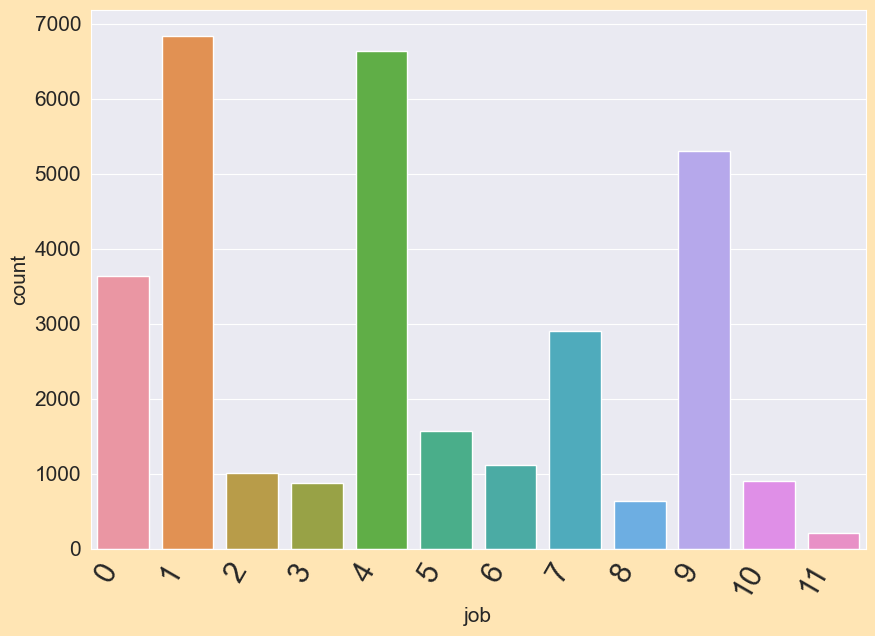

1     6839
4     6638
9     5306
0     3631
7     2903
5     1574
6     1123
2     1008
10     905
3      874
8      635
11     206
Name: job, dtype: int64


In [29]:
#countplot for job
sns.countplot(x=data['job'], data=data)
plt.xticks(rotation = 60, horizontalalignment = 'right',fontweight = 'light', fontsize = 'x-large')
plt.show()
print(data['job'].value_counts())

The most common job type among the customers is bluecollar, followed by management and technician. The least common job type is unknown, followed by student and housemaid. The job distribution is uneven, meaning that some job types are more frequent than others.

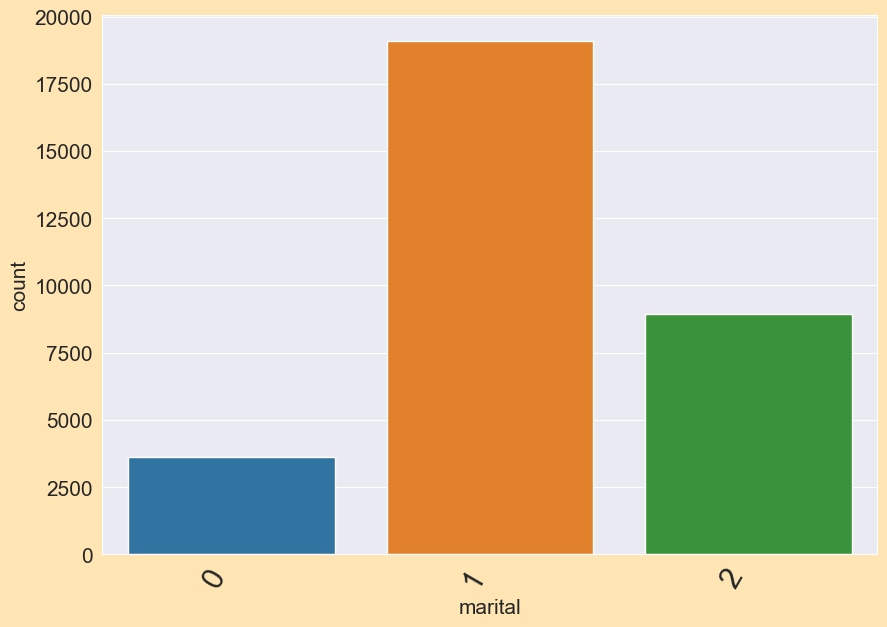

1    19092
2     8920
0     3630
Name: marital, dtype: int64


In [30]:
#countplot for marital
sns.countplot(x=data['marital'], data=data)
plt.xticks(rotation = 60, horizontalalignment = 'right',fontweight = 'light', fontsize = 'x-large')
plt.show()
print(data['marital'].value_counts())

The most common marital status among the customers is married, followed by single and divorced. The marital status distribution is fairly balanced, meaning that there are no major differences in the frequency of each category.

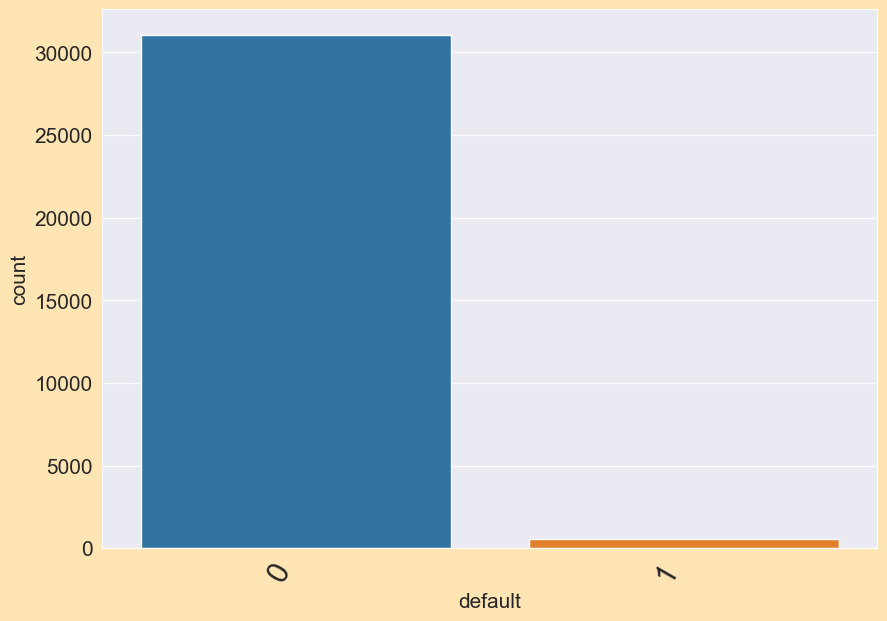

0    31057
1      585
Name: default, dtype: int64


In [31]:
#countplot for default
sns.countplot(x=data['default'], data=data)
plt.xticks(rotation = 60, horizontalalignment = 'right',fontweight = 'light', fontsize = 'x-large')
plt.show()
print(data['default'].value_counts())

The majority of the customers have no credit in default. The default, housing, and loan distributions are highly skewed, meaning that there are more customers with good credit score than those with bad credit scores.

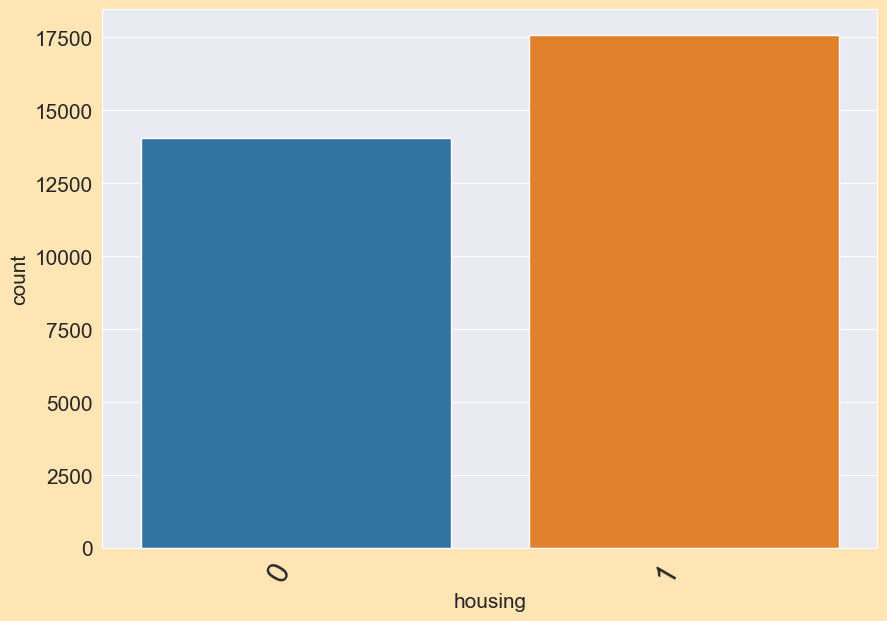

1    17581
0    14061
Name: housing, dtype: int64


In [32]:
#countplot for housing
sns.countplot(x=data['housing'], data=data)
plt.xticks(rotation = 60, horizontalalignment = 'right',fontweight = 'light', fontsize = 'x-large')
plt.show()
print(data['housing'].value_counts())

The majority of the customers have housing loan.Housing loan distribution are less skewed, meaning that there is a fair distribution between customers having housing loan and those not having housing loan.

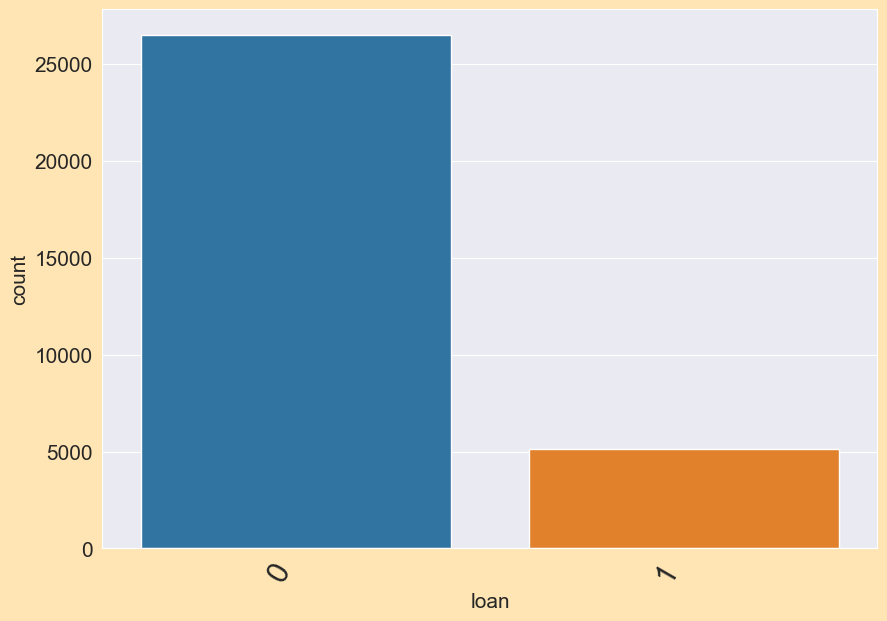

0    26511
1     5131
Name: loan, dtype: int64


In [33]:
#countplot for personal loan
sns.countplot(x=data['loan'], data=data)
plt.xticks(rotation = 60, horizontalalignment = 'right',fontweight = 'light', fontsize = 'x-large')
plt.show()
print(data['loan'].value_counts())

The majority of the customers have no personal loan. The loan distributions is highly skewed, meaning that there are more customers with no personal loan than those with personal loan.

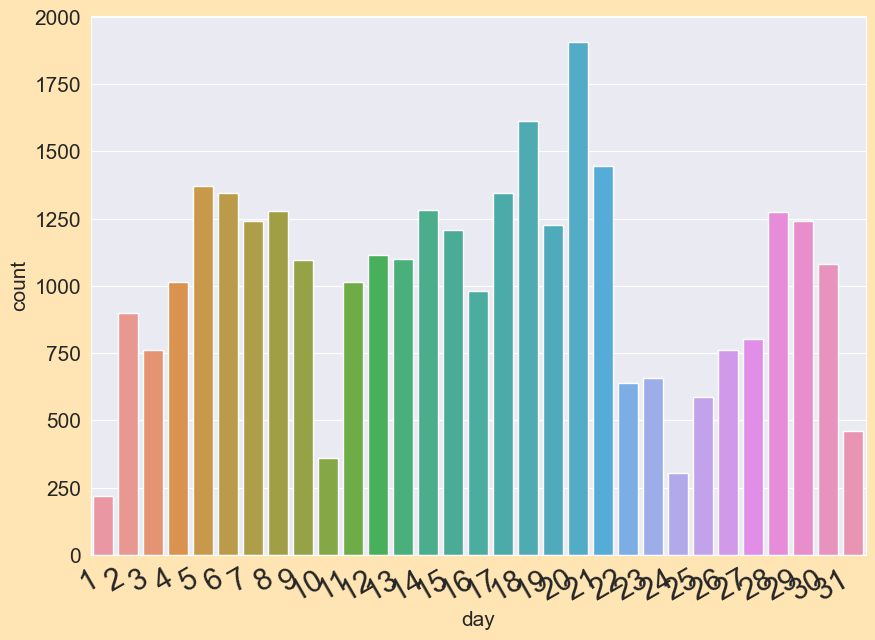

20    1909
18    1612
21    1445
5     1373
6     1347
17    1344
14    1282
8     1279
28    1276
29    1241
7     1240
19    1228
15    1208
12    1116
13    1099
9     1096
30    1082
4     1016
11    1014
16     981
2      900
27     804
3      761
26     761
23     657
22     640
25     586
31     460
10     360
24     305
1      220
Name: day, dtype: int64


In [34]:
#Countplot for day of week
sns.countplot(x=data['day'], data=data)
plt.xticks(rotation = 30, horizontalalignment = 'right',fontweight = 'light', fontsize = 'x-large')
plt.show()
print(data['day'].value_counts())

The most common day of the month when the customers were contacted is 20, followed by 18 and 21. The least common day of the month is 31, followed by 1 and 30. The day distribution is moderately skewed, meaning that there are some days that are more frequent than others.

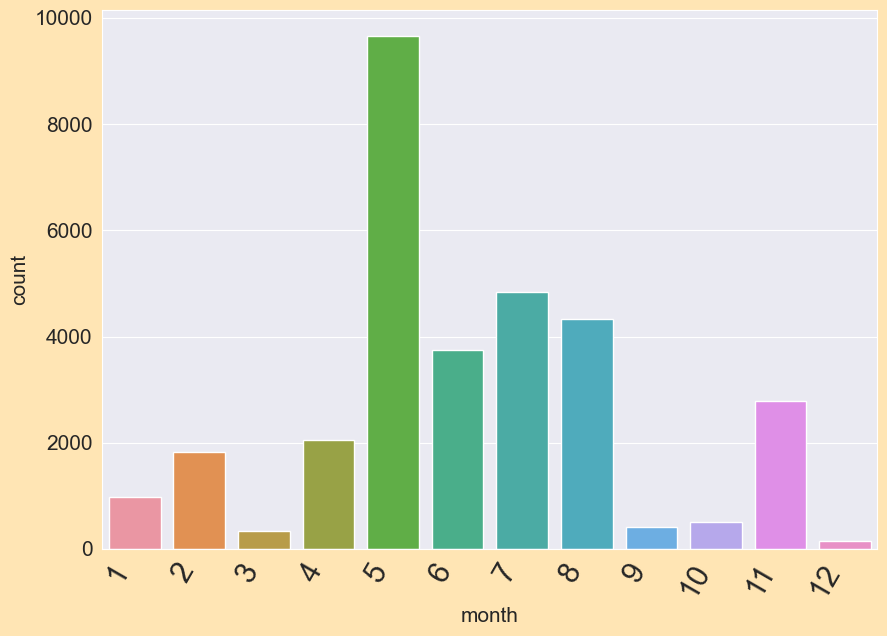

5     9667
7     4843
8     4331
6     3738
11    2783
4     2055
2     1827
1      977
10     512
9      410
3      342
12     157
Name: month, dtype: int64


In [35]:
#countplot for month
sns.countplot(x=data['month'],data = data)
plt.xticks(rotation = 60, horizontalalignment = 'right',fontweight = 'light', fontsize = 'x-large')
plt.show()
print(data['month'].value_counts())

The most common month when the customers were contacted is May, followed by July and August. The least common month is December, followed by March and September. The month distribution is highly skewed, meaning that there are some months that are more frequent than others.

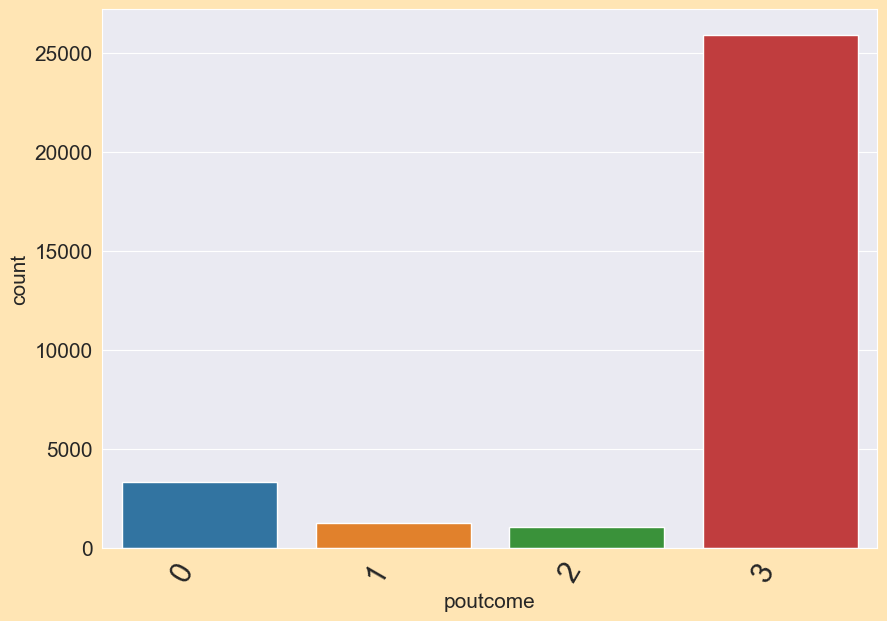

3    25924
0     3362
1     1288
2     1068
Name: poutcome, dtype: int64


In [36]:
#countplot for poutcome
sns.countplot(x=data['poutcome'], data=data)
plt.xticks(rotation = 60, horizontalalignment = 'right',fontweight = 'light', fontsize = 'x-large')
plt.show()
print(data['poutcome'].value_counts())

The most common outcome of the previous marketing campaign for this customer is unknown, followed by failure and success. The poutcome distribution is highly skewed, meaning that there are more customers with unknown outcome than with known outcome.

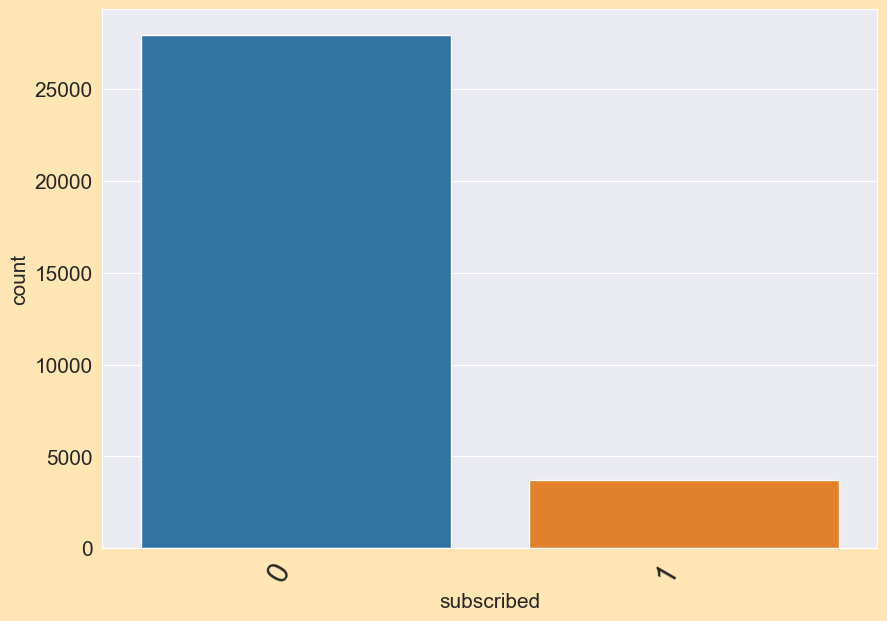

0    27927
1     3715
Name: subscribed, dtype: int64


In [37]:
#countplot for subscribed
sns.countplot(x=data['subscribed'], data=data)
plt.xticks(rotation = 60, horizontalalignment = 'right',fontweight = 'light', fontsize = 'x-large')
plt.show()
print(data['subscribed'].value_counts())

The most common outcome of the target column is no. The subscribed distribution is highly skewed, meaning that there are more customers that have not subscribed than those who have taken term deposit subscription.

In [38]:
data.columns

Index(['age', 'job', 'marital', 'default', 'housing', 'loan', 'day', 'month',
       'duration', 'campaign', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

# Subscription count based on job

In [39]:
job_subs = data.groupby('job')['subscribed'].sum().sort_values(ascending = False)
job_subs

job
4     923
9     594
1     489
0     452
5     362
7     254
8     182
6     140
10    129
2      85
3      79
11     26
Name: subscribed, dtype: int32

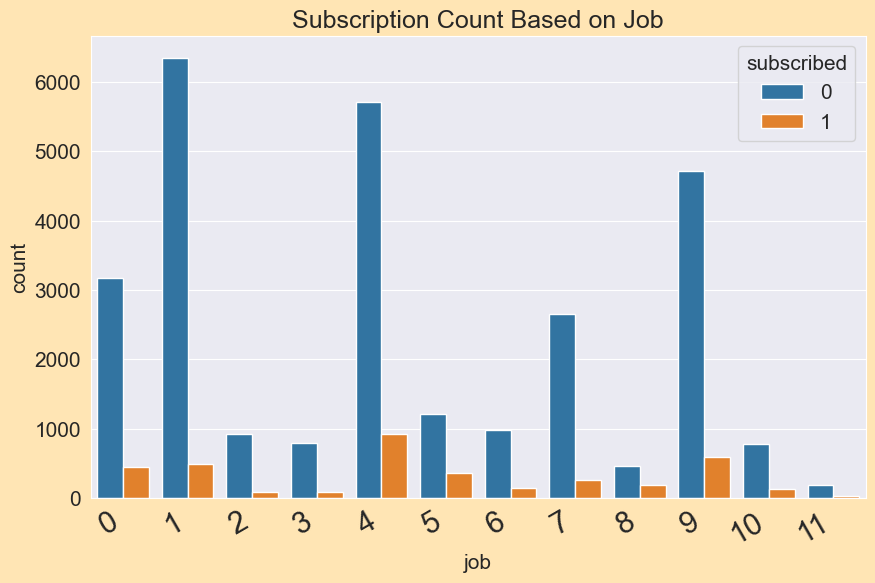

In [40]:
plt.figure(figsize=(10,6))
sns.countplot(x='job', hue='subscribed', data=data)
plt.xticks(rotation = 30, horizontalalignment = 'right',fontweight = 'light', fontsize = 'x-large')
plt.title('Subscription Count Based on Job')
plt.show()

from above it is very clear that those having management jobs have subscribed more and subscription rate for those whose job status is unknown is 0

# Subscription count based on marital

In [41]:
marital_subs = data.groupby('marital')['subscribed'].sum().sort_values(ascending = False)
marital_subs

marital
1    1919
2    1351
0     445
Name: subscribed, dtype: int32

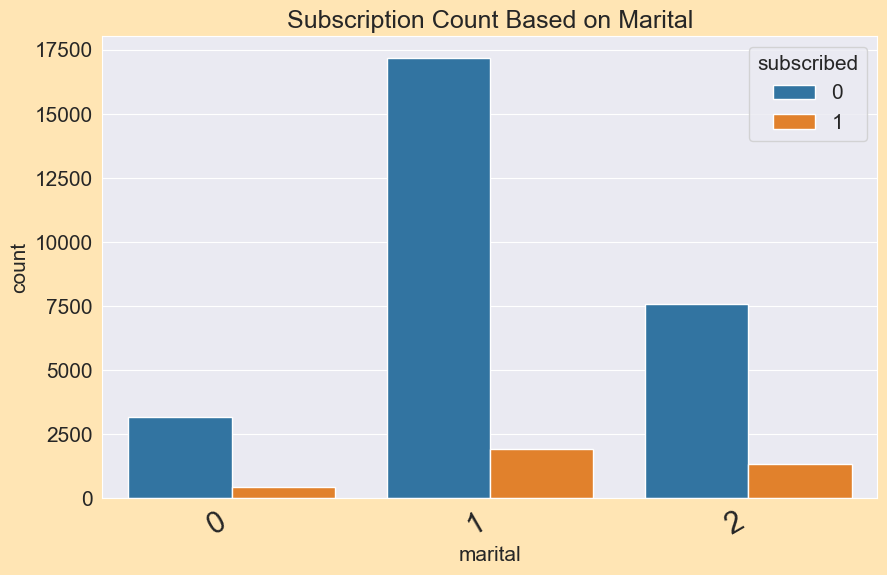

In [42]:
plt.figure(figsize=(10,6))
sns.countplot(x='marital', hue='subscribed', data=data)
plt.xticks(rotation = 30, horizontalalignment = 'right',fontweight = 'light', fontsize = 'x-large')
plt.title('Subscription Count Based on Marital')
plt.show()

Those who have married their subscription count is more and those who are divorced their subscription count is minimum

# Subscription count based on default

In [43]:
default_subs = data.groupby('default')['subscribed'].sum().sort_values(ascending = False)
default_subs

default
0    3674
1      41
Name: subscribed, dtype: int32

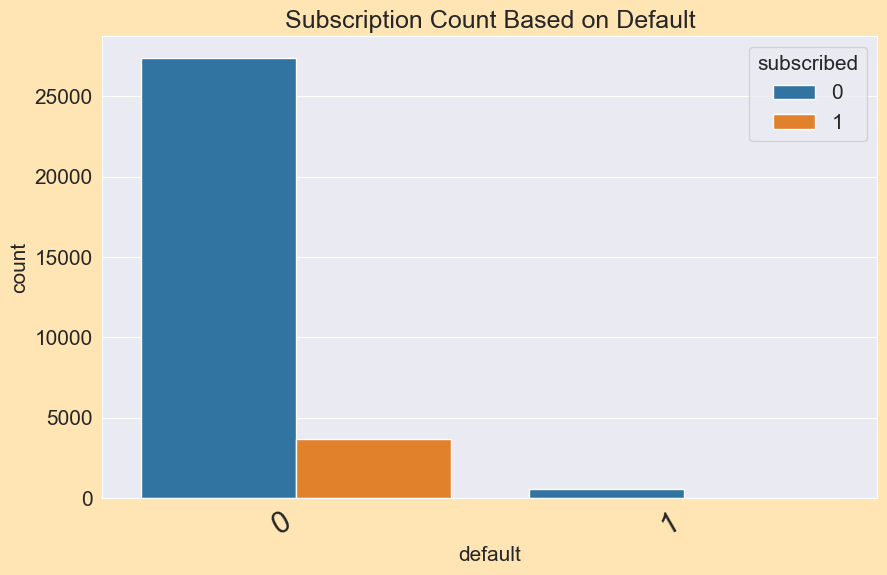

In [44]:
plt.figure(figsize=(10,6))
sns.countplot(x='default', hue='subscribed', data=data)
plt.xticks(rotation = 30, horizontalalignment = 'right',fontweight = 'light', fontsize = 'x-large')
plt.title('Subscription Count Based on Default')
plt.show()

Those who have no credit default tend to take subscription

# Subscription count based on housing

In [45]:
housing_subs = data.groupby('housing')['subscribed'].sum().sort_values(ascending = False)
housing_subs

housing
0    2365
1    1350
Name: subscribed, dtype: int32

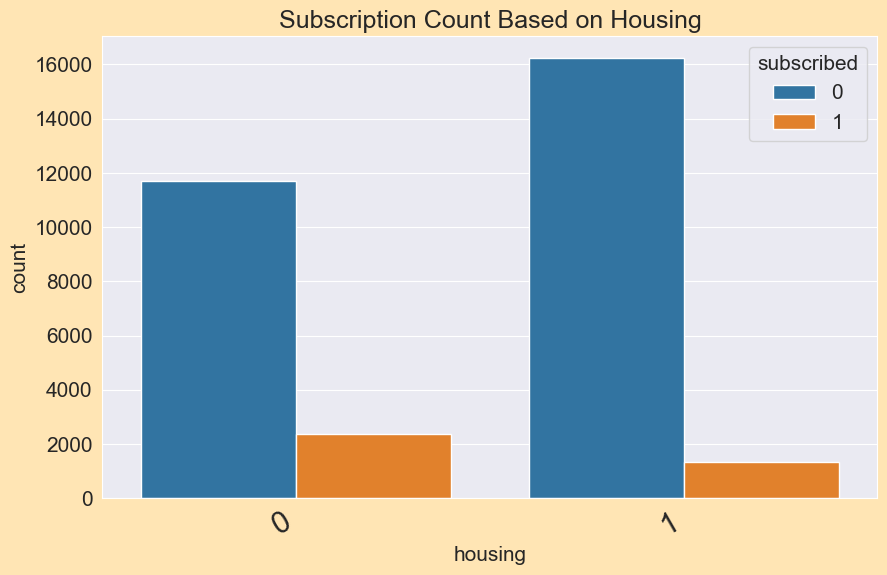

In [46]:
plt.figure(figsize=(10,6))
sns.countplot(x='housing', hue='subscribed', data=data)
plt.xticks(rotation = 30, horizontalalignment = 'right',fontweight = 'light', fontsize = 'x-large')
plt.title('Subscription Count Based on Housing')
plt.show()

Those who dont have housing loan tend to take term deposit insurance

# Subscription count based on personal loan

In [47]:
loan_subs = data.groupby('loan')['subscribed'].sum().sort_values(ascending = False)
loan_subs

loan
0    3384
1     331
Name: subscribed, dtype: int32

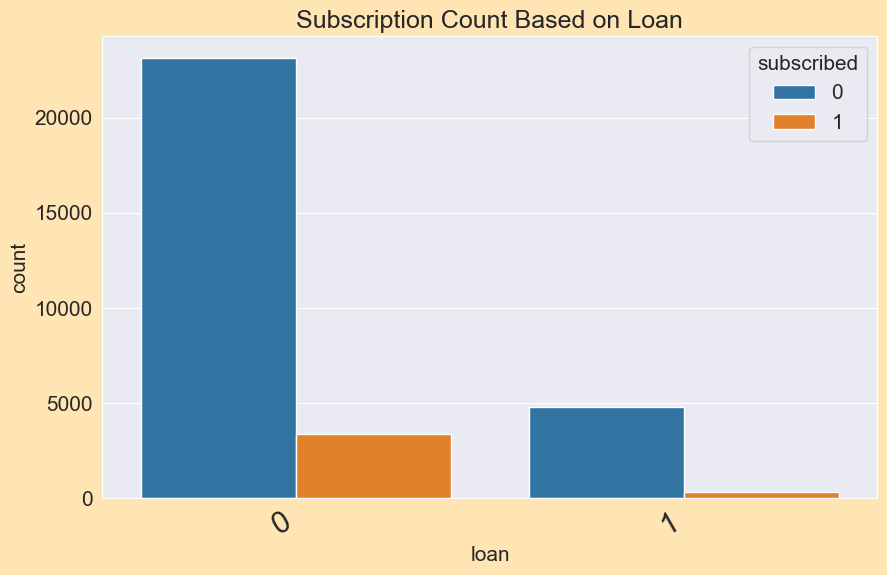

In [48]:
plt.figure(figsize=(10,6))
sns.countplot(x='loan', hue='subscribed', data=data)
plt.xticks(rotation = 30, horizontalalignment = 'right',fontweight = 'light', fontsize = 'x-large')
plt.title('Subscription Count Based on Loan')
plt.show()

those who dont have personal loan tend to take subscription more than those who have.

# Subscription count based on day

In [49]:
day_subs = data.groupby('day')['subscribed'].sum().sort_values(ascending = False)
day_subs

day
15    177
13    175
30    174
12    172
18    164
4     153
5     153
14    145
21    142
16    140
6     136
8     135
11    131
20    130
2     126
3     126
9     121
7     117
22    117
17    112
27    104
28    104
29     93
25     92
19     87
23     87
26     83
10     79
1      59
24     46
31     35
Name: subscribed, dtype: int32

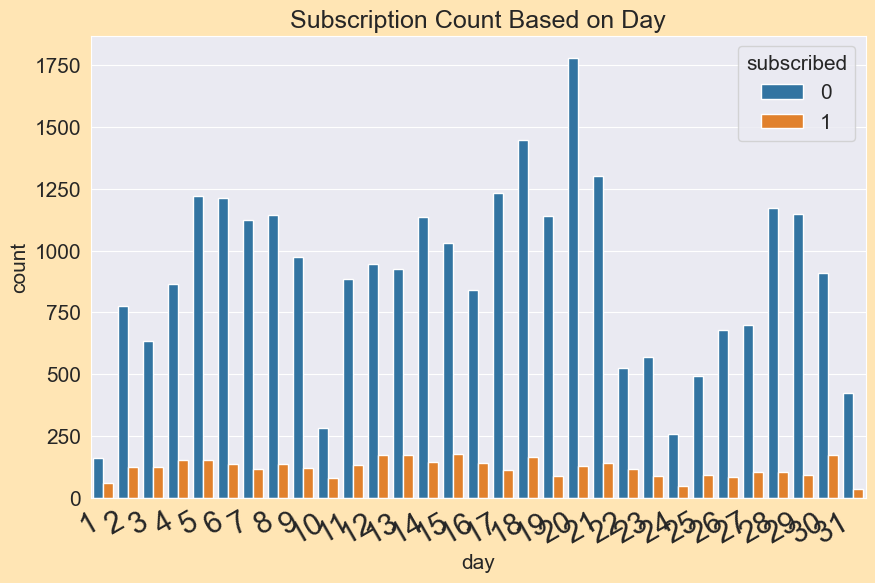

In [50]:
plt.figure(figsize=(10,6))
sns.countplot(x='day', hue='subscribed', data=data)
plt.xticks(rotation = 30, horizontalalignment = 'right',fontweight = 'light', fontsize = 'x-large')
plt.title('Subscription Count Based on Day')
plt.show()

# Subscription count based on month

In [51]:
month_subs = data.groupby('month')['subscribed'].sum().sort_values(ascending = False)
month_subs

month
5     649
8     520
7     441
4     384
6     383
2     305
11    275
10    224
9     191
3     174
1      97
12     72
Name: subscribed, dtype: int32

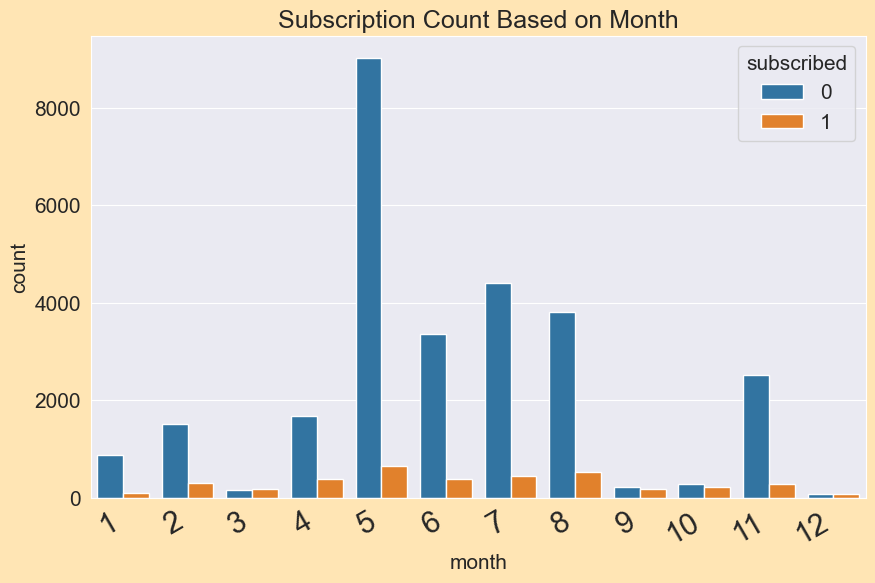

In [52]:
plt.figure(figsize=(10,6))
sns.countplot(x='month', hue='subscribed', data=data)
plt.xticks(rotation = 30, horizontalalignment = 'right',fontweight = 'light', fontsize = 'x-large')
plt.title('Subscription Count Based on Month')
plt.show()

In [53]:
data.columns

Index(['age', 'job', 'marital', 'default', 'housing', 'loan', 'day', 'month',
       'duration', 'campaign', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

# Subscription count based on poutcome

In [54]:
po_subs = data.groupby('poutcome')['subscribed'].sum().sort_values(ascending = False)
po_subs

poutcome
3    2373
2     694
0     431
1     217
Name: subscribed, dtype: int32

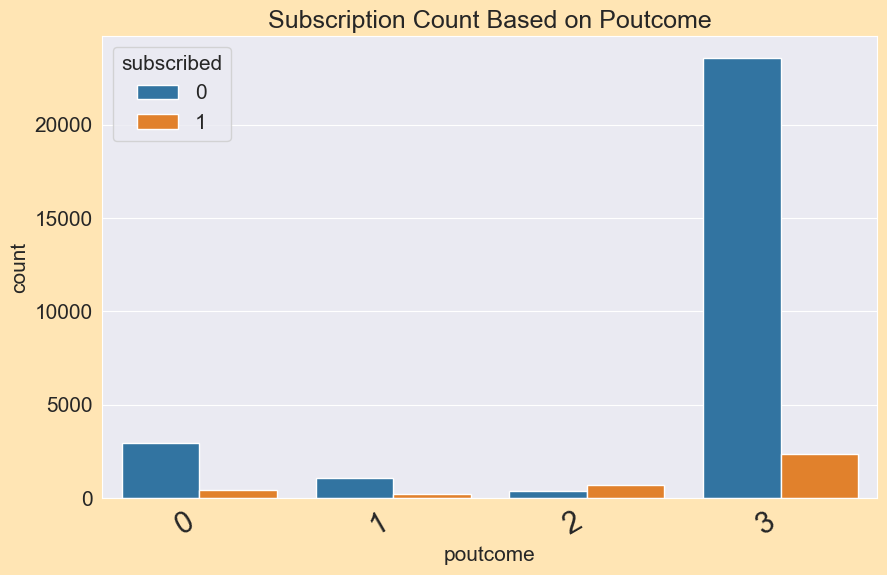

In [55]:
plt.figure(figsize=(10,6))
sns.countplot(x='poutcome', hue='subscribed', data=data)
plt.xticks(rotation = 30, horizontalalignment = 'right',fontweight = 'light', fontsize = 'x-large')
plt.title('Subscription Count Based on Poutcome')
plt.show()

# Data distribution

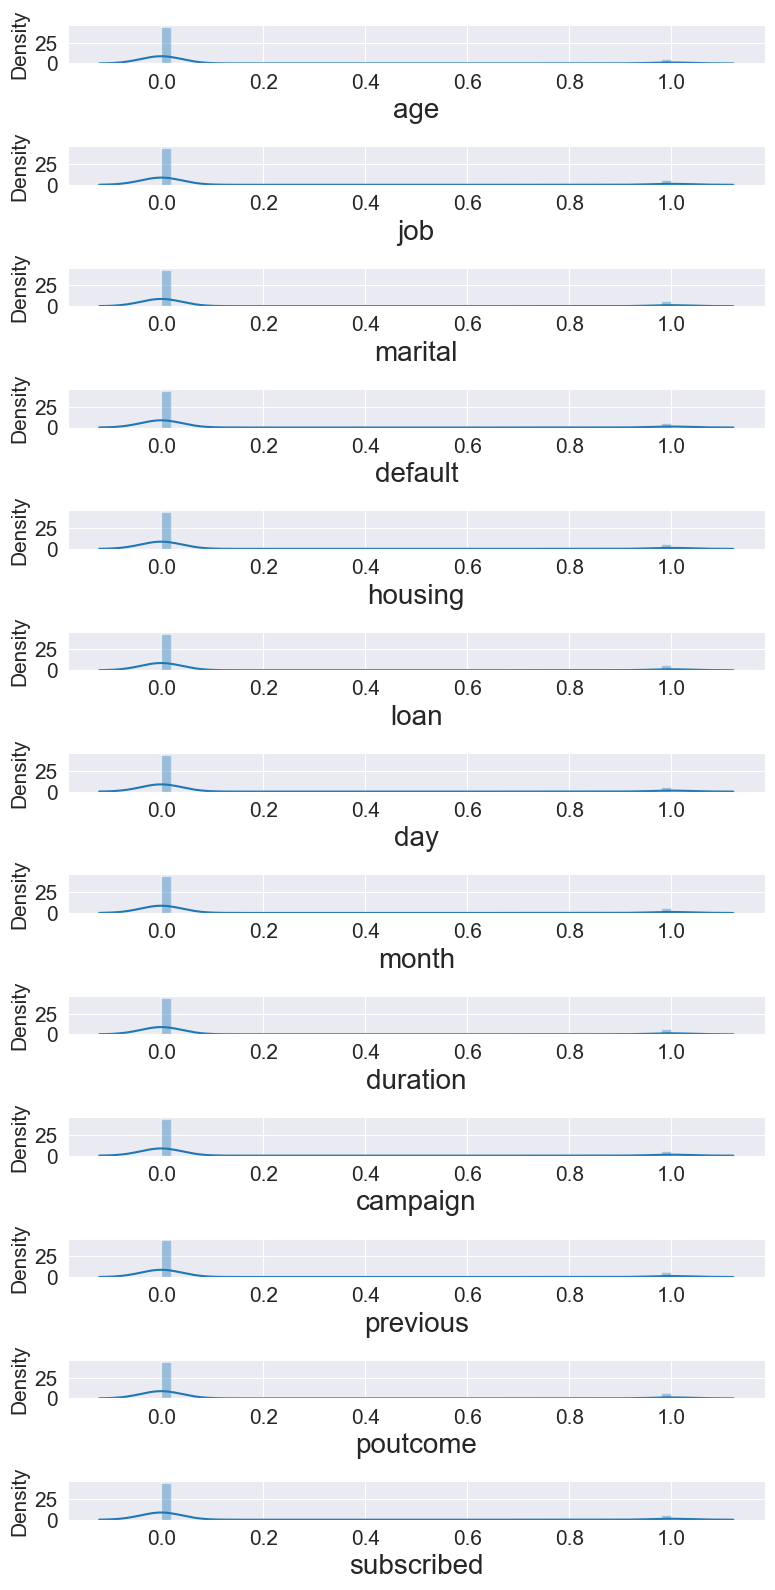

In [56]:
plt.figure(figsize = (8,16), facecolor = 'white')
plotnumber = 1 # assigning variable
for column in data:
    if plotnumber<=13:
        ax = plt.subplot(13,1,plotnumber)
        sns.distplot(data[col])
        plt.xlabel(column,fontsize = 20)
    plotnumber += 1

plt.tight_layout()

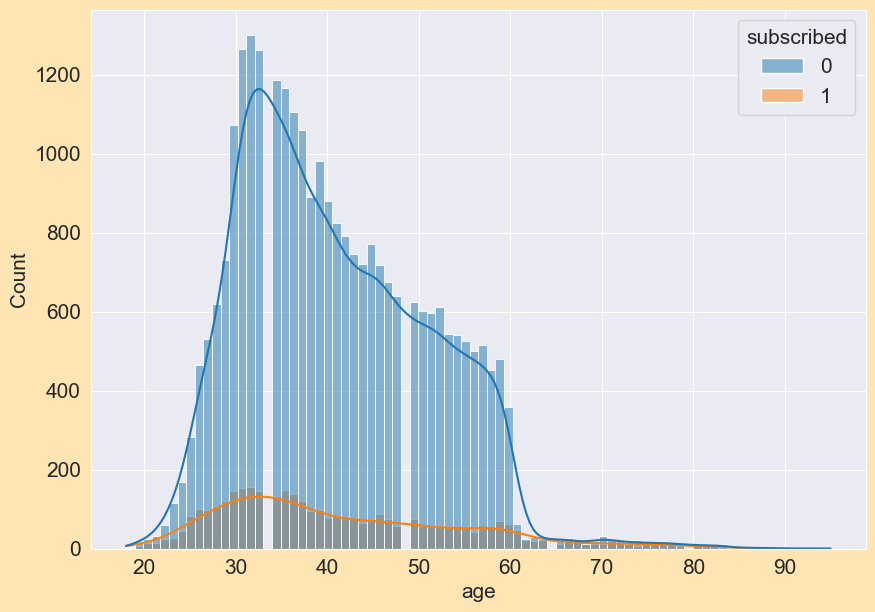

In [57]:
#histplot of age
sns.histplot(data = data,x = 'age',kde=True,hue = 'subscribed')
plt.show()

People between the age of 20 - 40 tend to make term deposit. Data is right skewed

In [58]:
data.columns

Index(['age', 'job', 'marital', 'default', 'housing', 'loan', 'day', 'month',
       'duration', 'campaign', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

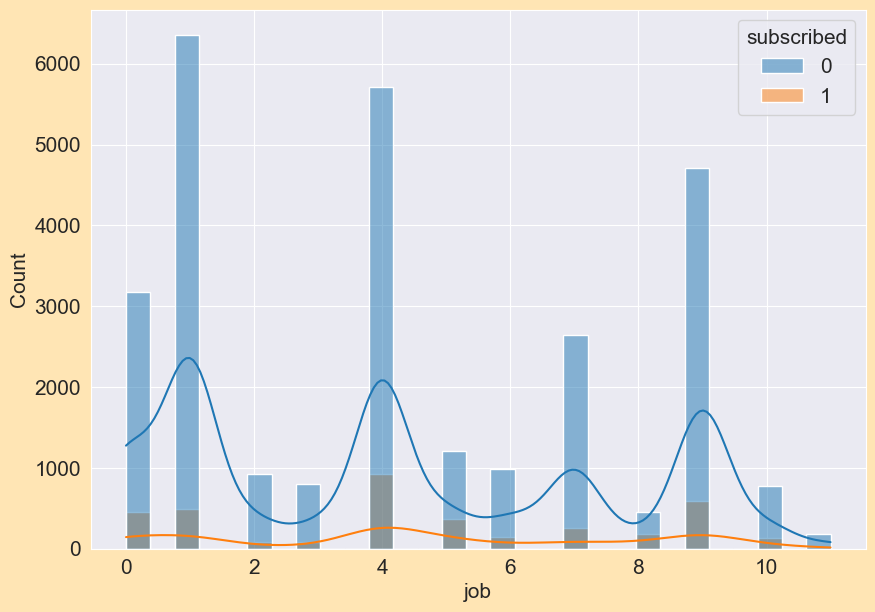

In [59]:
#histplot of job
sns.histplot(data = data,x = 'job',kde=True,hue = 'subscribed')
plt.show()

Job distribution is uneven and people with management jobs tend to subscribe

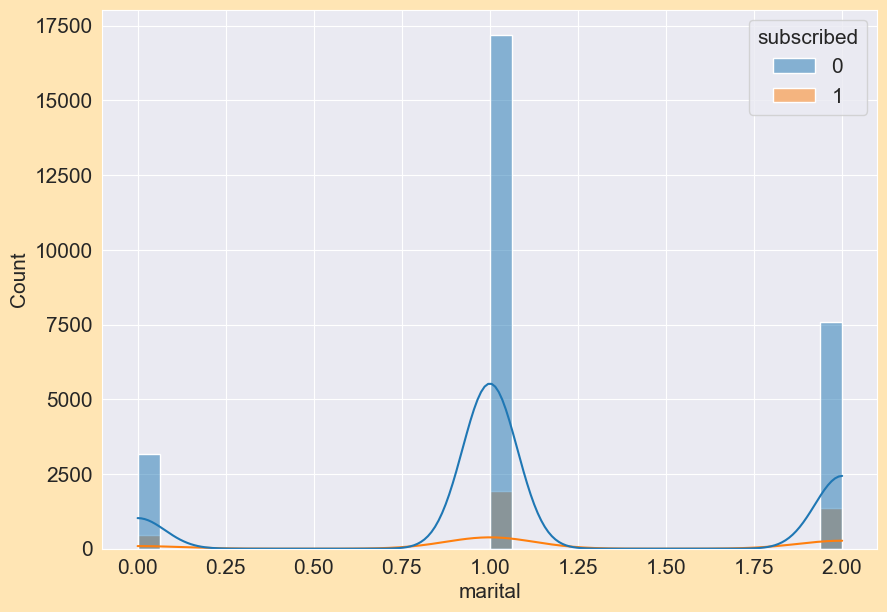

In [60]:
#histplot of marital
sns.histplot(data = data,x = 'marital',kde=True,hue = 'subscribed')
plt.show()

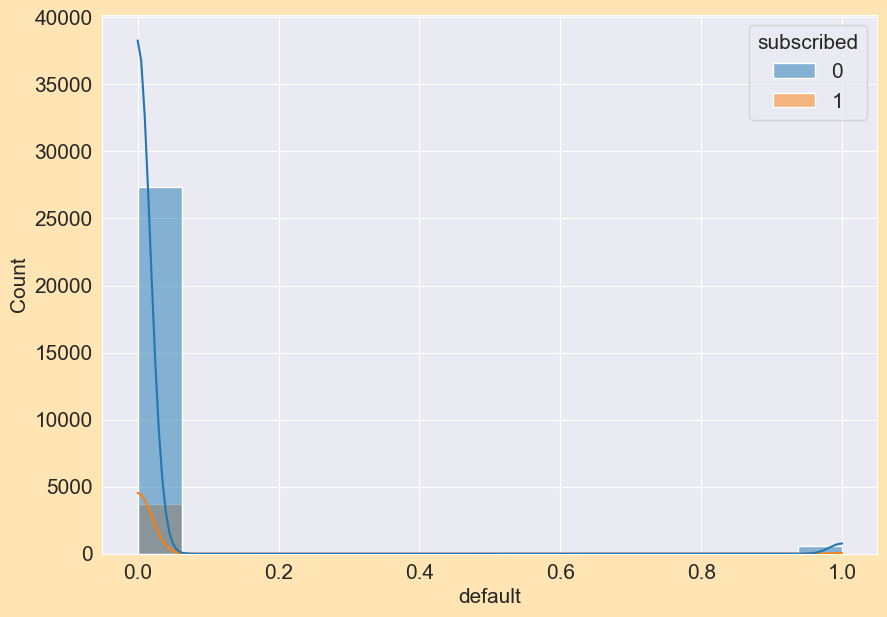

In [61]:
#histplot of default
sns.histplot(data = data,x = 'default',kde=True,hue = 'subscribed')
plt.show()

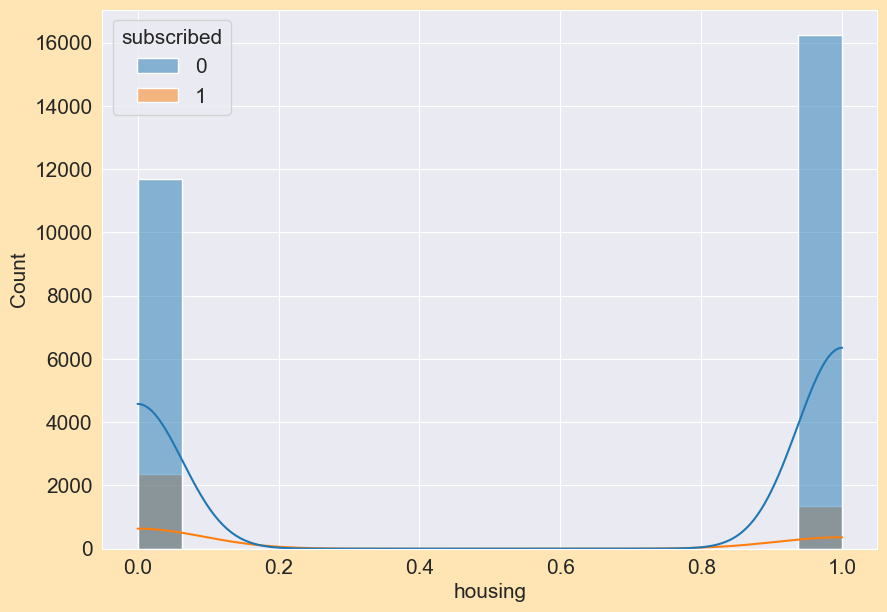

In [62]:
#histplot of housing
sns.histplot(data = data,x = 'housing',kde=True,hue = 'subscribed')
plt.show()

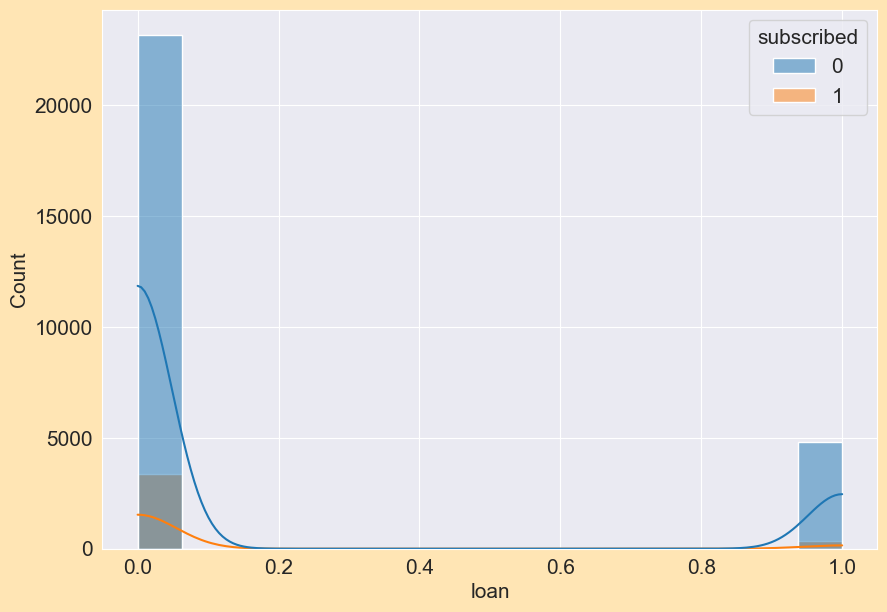

In [63]:
#histplot of loan
sns.histplot(data = data,x = 'loan',kde=True,hue = 'subscribed')
plt.show()

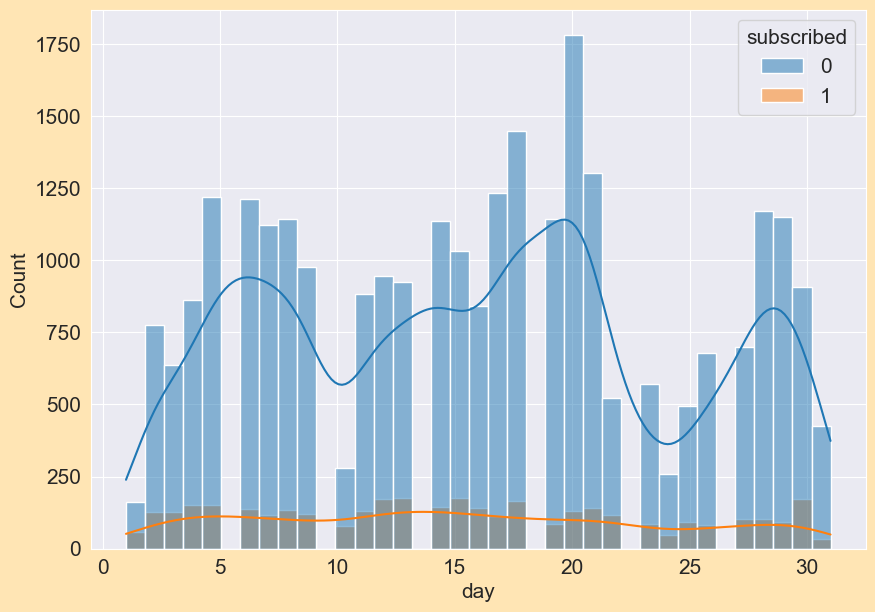

In [64]:
#histplot of day
sns.histplot(data = data,x = 'day',kde=True,hue = 'subscribed')
plt.show()

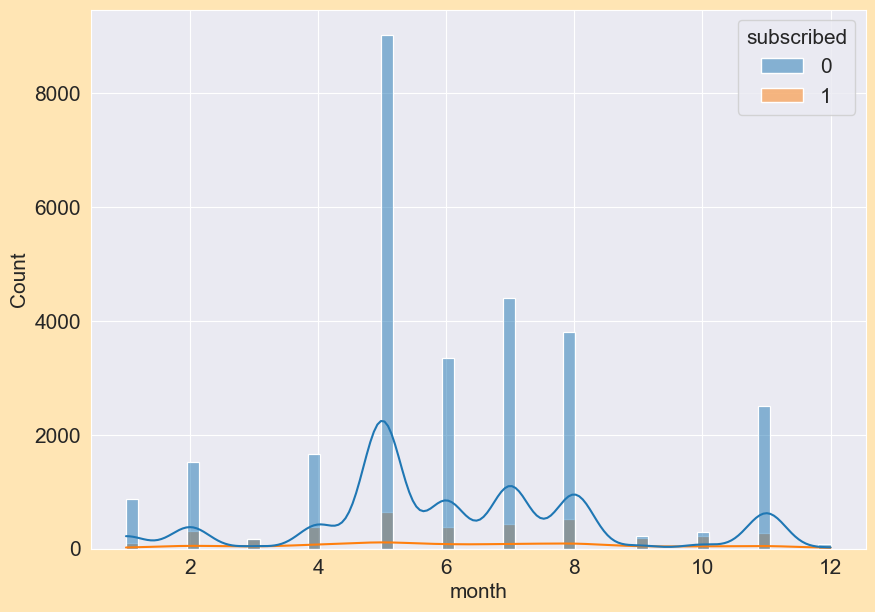

In [65]:
#histplot of month
sns.histplot(data = data,x = 'month',kde=True,hue = 'subscribed')
plt.show()

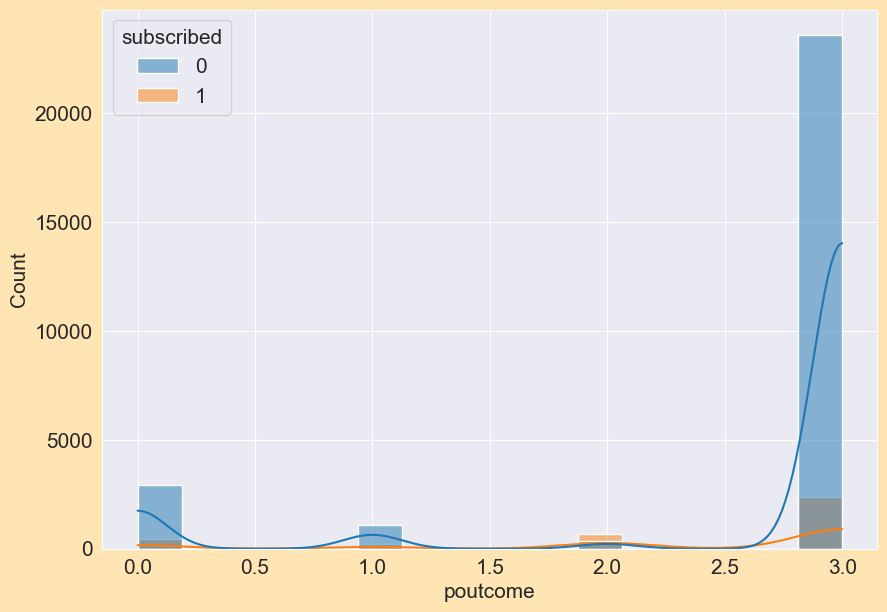

In [66]:
#histplot of poutcome
sns.histplot(data = data,x = 'poutcome',kde=True,hue = 'subscribed')
plt.show()

# Checking for correlation

In [67]:
data.corr()

,age,job,marital,default,housing,loan,day,month,duration,campaign,previous,poutcome,subscribed
age,1.000000,-0.020760,-0.405991,-0.016130,-0.183839,-0.012696,-0.011117,0.098765,-0.003924,0.005707,0.005741,0.006504,0.024508
job,-0.020760,1.000000,0.066050,-0.005225,-0.125233,-0.039077,0.020901,0.045112,0.002681,0.001445,-0.003045,0.007125,0.038905
marital,-0.405991,0.066050,1.000000,-0.009583,-0.017728,-0.041631,-0.007662,-0.052506,0.011594,-0.009383,0.012732,-0.019799,0.046068
default,-0.016130,-0.005225,-0.009583,1.000000,-0.011822,0.081558,0.009979,0.014248,-0.010862,0.018532,-0.015882,0.035077,-0.020176
housing,-0.183839,-0.125233,-0.017728,-0.011822,1.000000,0.036254,-0.025627,-0.173927,0.003015,-0.021066,0.034237,-0.092692,-0.141099
loan,-0.012696,-0.039077,-0.041631,0.081558,0.036254,1.000000,0.014713,0.022731,-0.012823,0.009318,-0.009274,0.010950,-0.072293
day,-0.011117,0.020901,-0.007662,0.009979,-0.025627,0.014713,1.000000,0.099370,-0.032372,0.159139,-0.048786,0.077649,-0.029649
month,0.098765,0.045112,-0.052506,0.014248,-0.173927,0.022731,0.099370,1.000000,-0.008205,0.053190,-0.028658,0.066130,0.023165
duration,-0.003924,0.002681,0.011594,-0.010862,0.003015,-0.012823,-0.032372,-0.008205,1.000000,-0.080334,0.001760,0.009814,0.389820
campaign,0.005707,0.001445,-0.009383,0.018532,-0.021066,0.009318,0.159139,0.053190,-0.080334,1.000000,-0.033163,0.100744,-0.070626


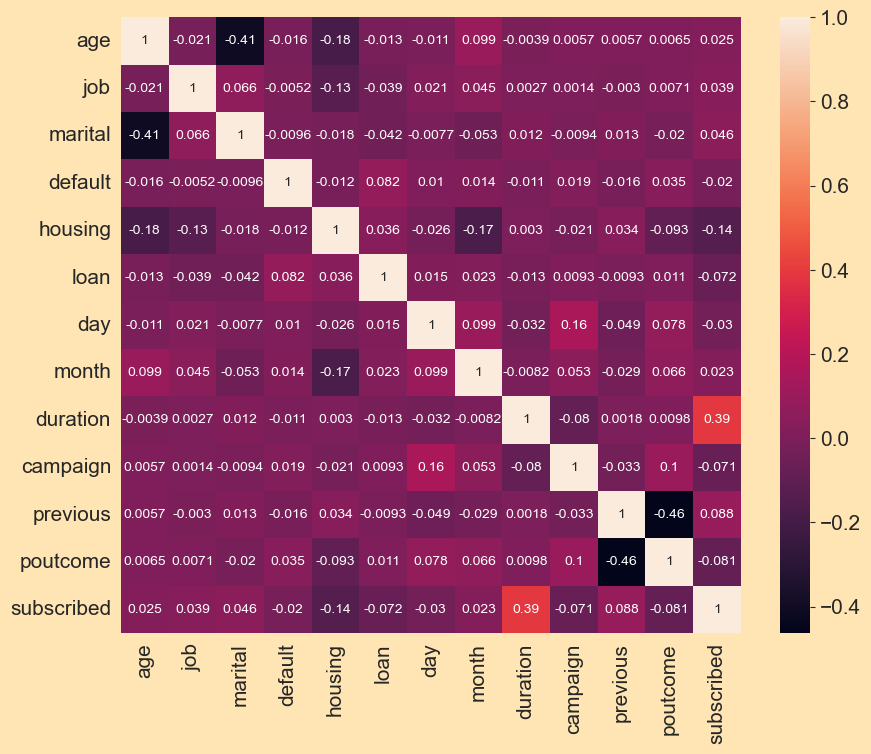

In [68]:
plt.figure(figsize = (10,8))
sns.heatmap(data.corr(),annot= True,annot_kws = {'size':10})
plt.show()

# Observations :
    
1. Age and Marital Status (-0.405991): This negative correlation suggests that as age increases, the marital status decreases. This could be due to the way marital status is coded (e.g., 0 = unmarried, 1 = married). It might be interesting to further investigate this relationship.

2. Age and Job (-0.020760): The correlation here is close to zero, suggesting there’s no significant relationship between a person’s age and their job.

3. Job and Marital Status (0.066050): This positive correlation, although weak, could suggest that there’s a slight tendency for certain jobs to be associated with certain marital statuses.

4. Housing and Month (-0.173927): This negative correlation might suggest that there are fewer housing subscriptions in certain months. This could be due to seasonal factors.

5. Duration and Subscribed (0.389820): This is a moderate positive correlation, suggesting that the longer the duration, the higher the likelihood of subscription. This could be a key factor in predicting subscription status.

6. Campaign and Day (0.159139): This positive correlation suggests that campaigns tend to be more active on certain days.

7. Previous and Poutcome (-0.463027): This strong negative correlation might suggest that the outcome of the previous campaign is less likely to be successful if there were many contacts before the campaign.

# Outlier Detection

In [69]:
data.columns

Index(['age', 'job', 'marital', 'default', 'housing', 'loan', 'day', 'month',
       'duration', 'campaign', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

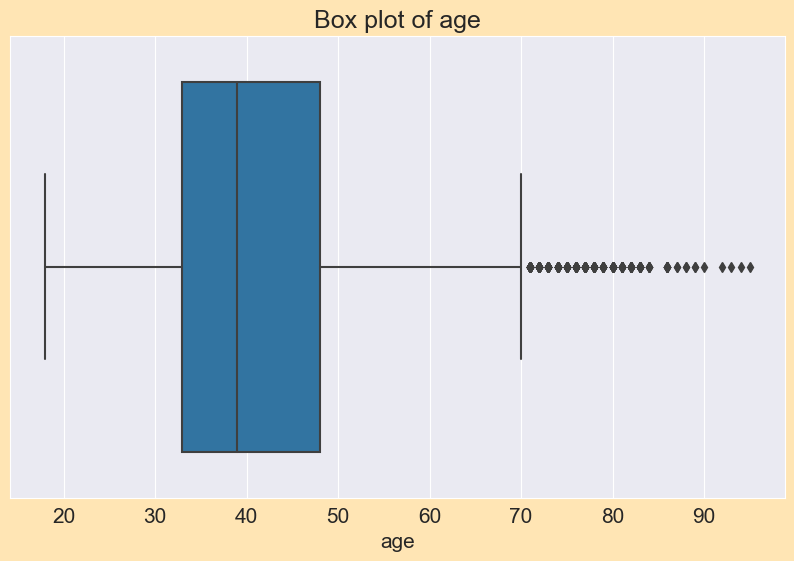

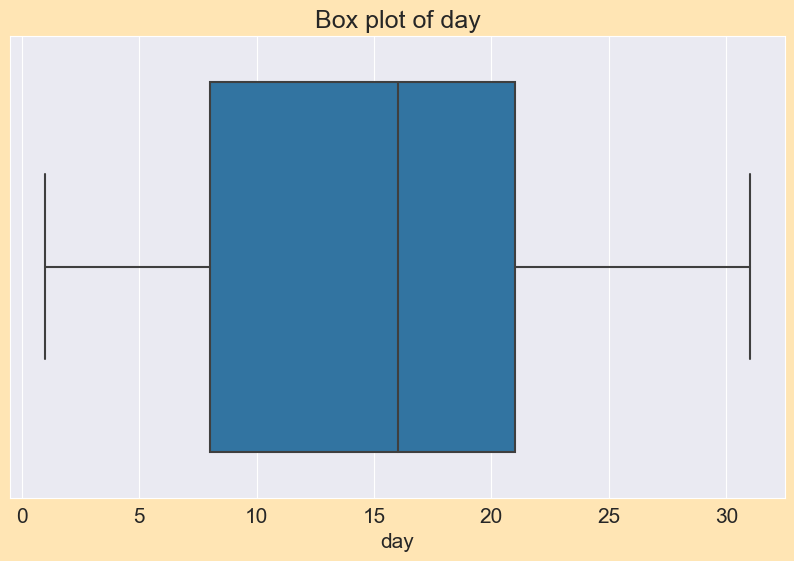

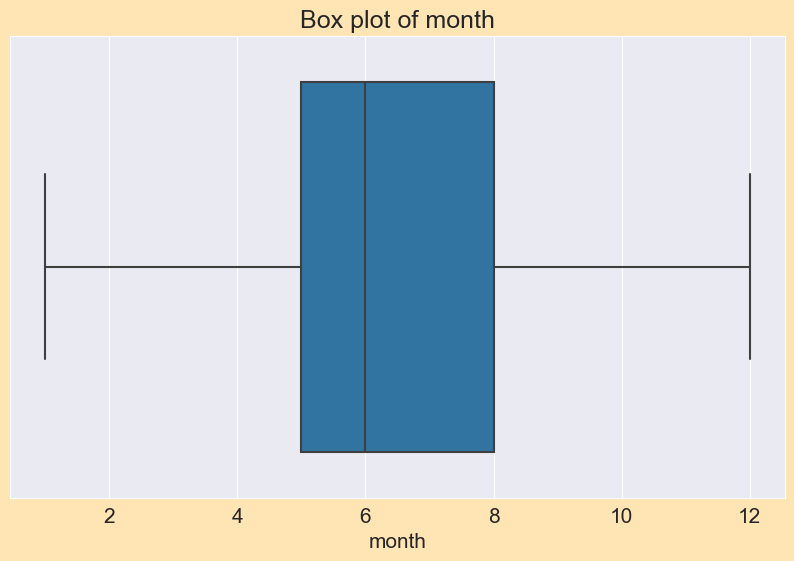

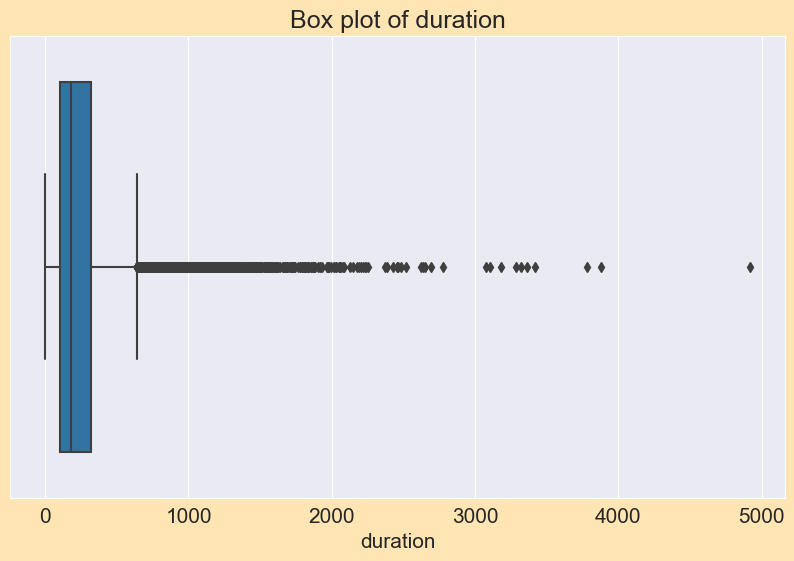

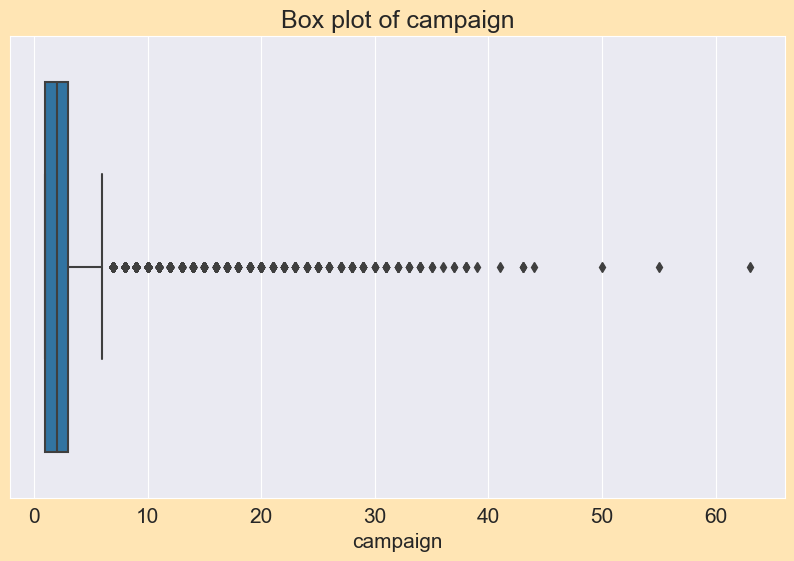

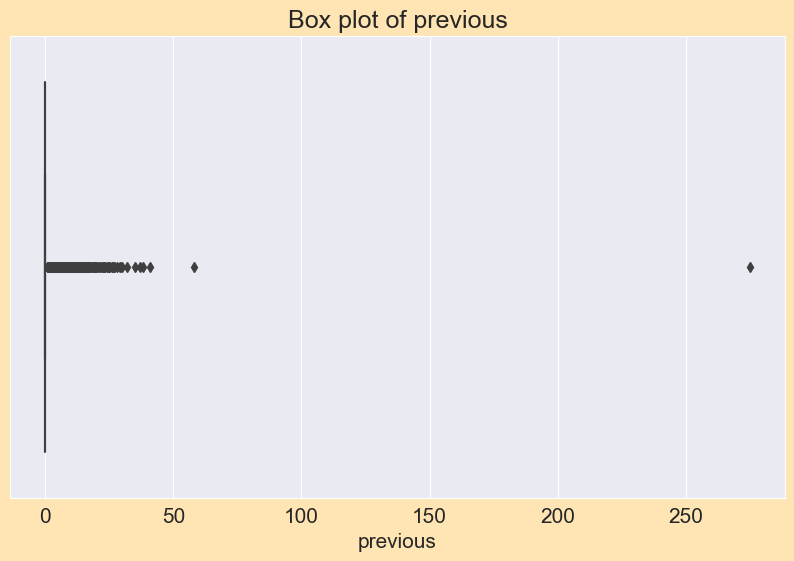

In [70]:
columns = ['age', 'day', 'month','duration', 'campaign', 'previous']

for column in columns:
    plt.figure(figsize=(10,6))
    sns.boxplot(x=data[column])
    plt.title(f'Box plot of {column}')
    plt.show()

# Treating Outliers

In [71]:
#evaluating zscore for outlier detection
from scipy.stats import zscore
z = np.abs(zscore(data[columns]))
z

,age,day,month,duration,campaign,previous
0,1.415648,0.379442,2.016884,0.832811,0.245938,0.237078
1,0.937202,0.499388,0.354583,0.650022,0.245938,0.237078
2,1.313658,0.259497,0.354583,0.070542,0.567068,0.237078
3,1.509762,0.739279,0.060993,2.367942,0.567068,1.001224
4,0.937202,1.419742,1.723294,0.473936,0.567068,0.237078
...,...,...,...,...,...,...
31637,1.125430,0.460177,0.476568,0.552794,0.245938,0.237078
31638,1.133306,1.299796,0.060993,0.699506,0.245938,0.237078
31639,0.843088,1.059905,0.770158,0.860035,0.075193,0.237078
31640,1.509762,0.100340,0.476568,0.918372,1.359715,4.716132


In [72]:
#threshold >3
np.where(z>3)

(array([   21,   134,   143, ..., 31617, 31640, 31641], dtype=int64),
 array([4, 4, 5, ..., 0, 5, 3], dtype=int64))

In [73]:
#making a new dataframe removing outliers
df1 = data[(z<3).all(axis =1)]
df1.shape

(29728, 13)

In [74]:
print('Old Data Frame shape', data.shape[0])
print('New Data Frame shape', df1.shape[0])

Old Data Frame shape 31642
New Data Frame shape 29728


In [75]:
print('Data Loss Percentage = ', ((data.shape[0]-df1.shape[0])/data.shape[0])*100)

Data Loss Percentage =  6.04892231843752


Data loss percentage is below 10% with z score method. Lets check by iqr method also

In [76]:
Q1 = data[columns].quantile(0.25)
Q3 = data[columns].quantile(0.75)
IQR = Q3 - Q1

# Create a boolean mask for the outliers
df2 = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis = 1)]

In [77]:
df2.shape

(21953, 13)

In [78]:
print('Data Loss Percentage = ', ((data.shape[0]-df2.shape[0])/data.shape[0])*100)

Data Loss Percentage =  30.620694014284812


Data loss percentage is more than 10% with iqr method.

In [79]:
df1

,age,job,marital,default,housing,loan,day,month,duration,campaign,previous,poutcome,subscribed
0,56,0,1,0,0,0,19,11,44,2,0,3,0
1,31,11,1,0,0,0,20,7,91,2,0,3,0
2,27,7,1,0,1,0,18,7,240,1,0,3,0
3,57,4,0,0,0,0,22,6,867,1,3,2,1
4,31,9,1,0,1,0,4,2,380,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31635,43,4,2,0,0,0,20,6,30,4,0,3,0
31636,37,9,2,0,0,0,6,6,442,2,0,3,0
31637,29,4,2,0,1,0,12,5,116,2,0,3,0
31638,53,4,0,0,0,1,5,6,438,2,0,3,1


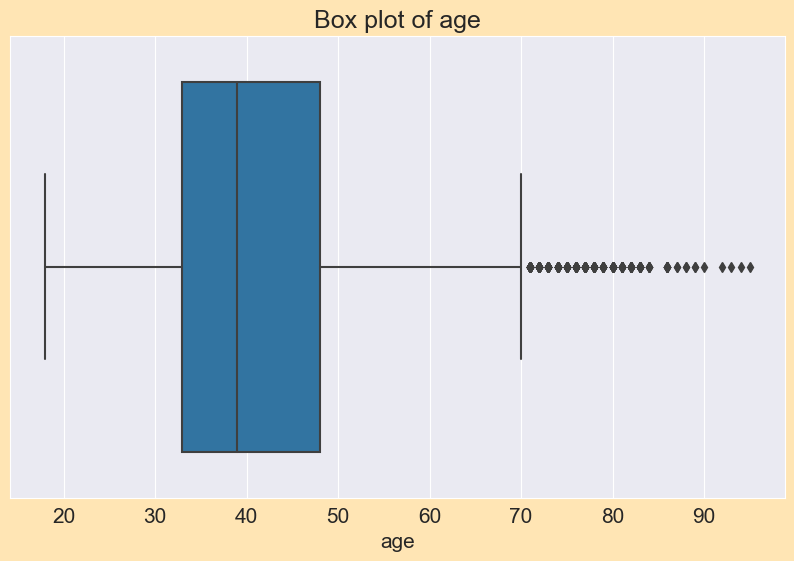

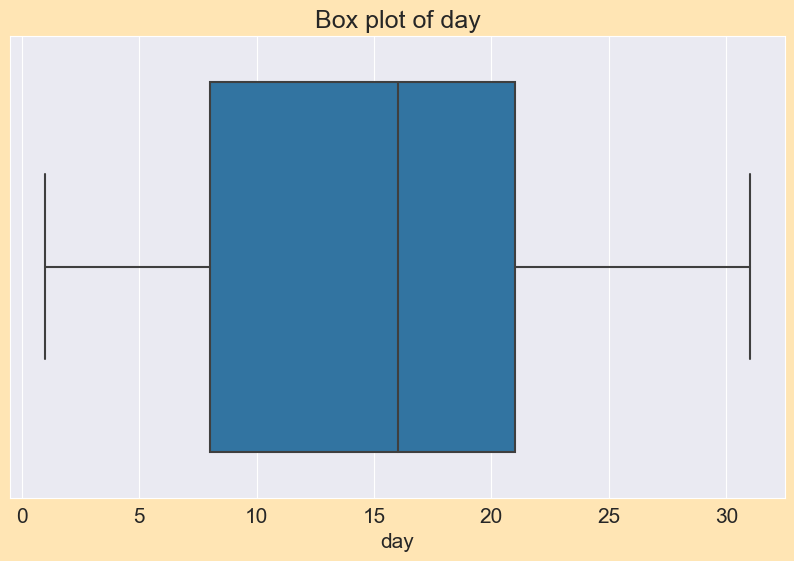

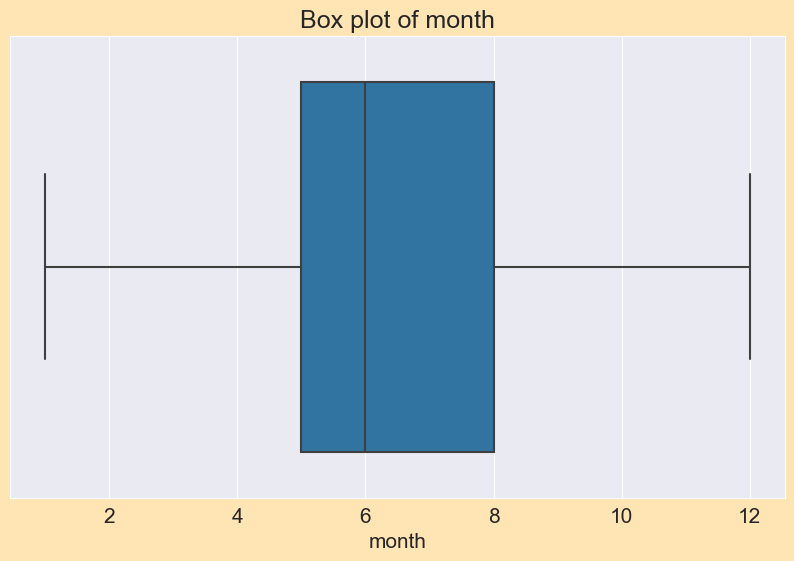

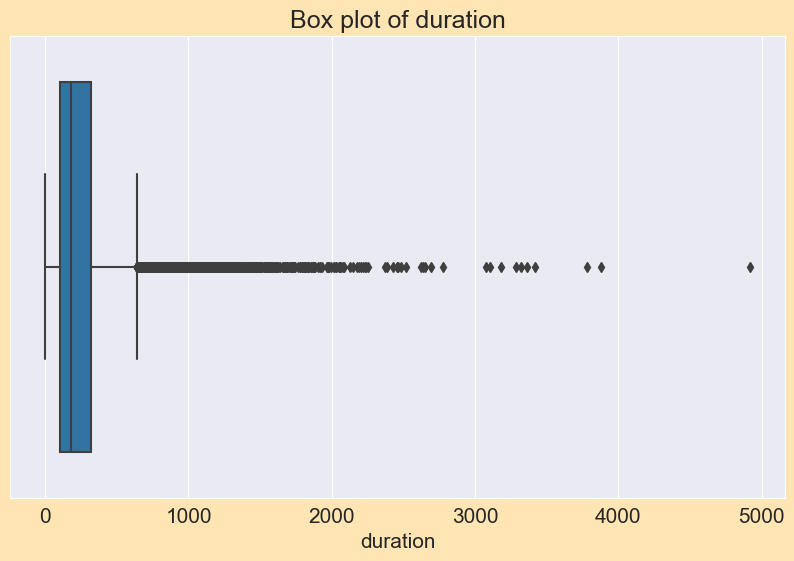

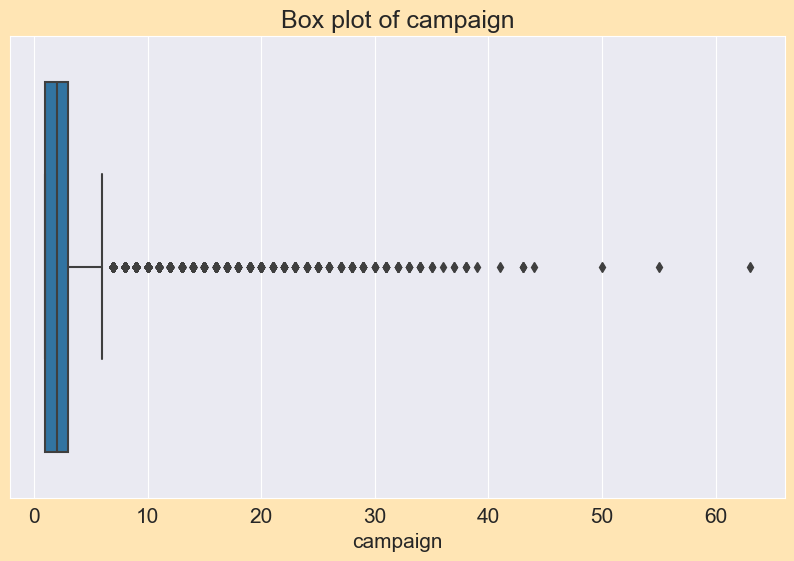

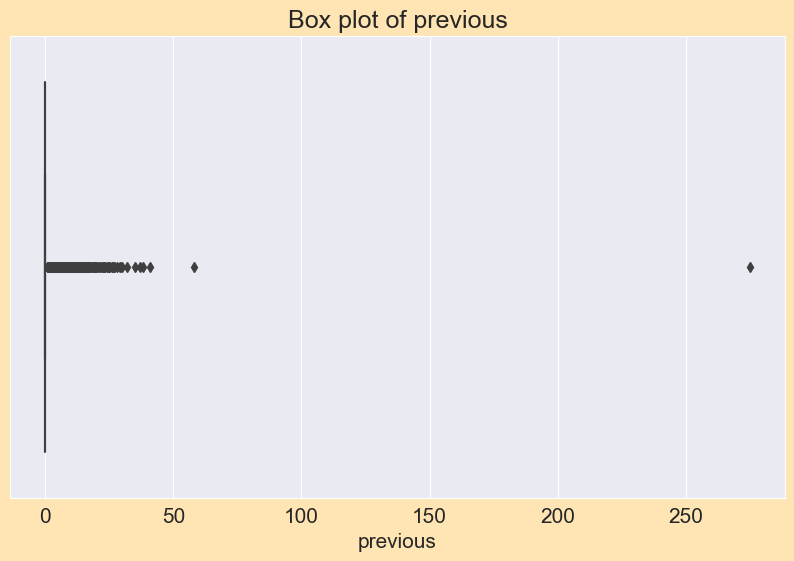

In [80]:
columns = ['age', 'day', 'month','duration', 'campaign', 'previous']

for column in columns:
    plt.figure(figsize=(10,6))
    sns.boxplot(x=data[column])
    plt.title(f'Box plot of {column}')
    plt.show()

Outliers have been reduced to some extent

# Skewness treatment

In [81]:
df1.skew()

age           0.444081
job           0.268226
marital      -0.101217
default       7.126133
housing      -0.238366
loan          1.821064
day           0.095328
month         0.264123
duration      1.591198
campaign      2.074934
previous      3.279797
poutcome     -2.062530
subscribed    2.590923
dtype: float64

# Observations:

Positive skewness (right-skewed): Most values are concentrated on the left of the mean, with the tail extending to the right. Variables with positive skewness in your data include age, job, loan, day, month, duration, campaign, previous, and subscribed.

Negative skewness (left-skewed): Most values are concentrated on the right of the mean, with the tail extending to the left. Variables with negative skewness in your data include marital, housing, and poutcome.

No skewness (0): The data is evenly distributed on both sides of the mean. This is the case for your default variable.

In [82]:
df1[['duration', 'campaign', 'previous', 'poutcome']] = np.cbrt(df1[['duration', 'campaign', 'previous', 'poutcome']])

In [83]:
df1.skew()

age           0.444081
job           0.268226
marital      -0.101217
default       7.126133
housing      -0.238366
loan          1.821064
day           0.095328
month         0.264123
duration      0.298972
campaign      1.007026
previous      1.940238
poutcome     -2.428926
subscribed    2.590923
dtype: float64

# Feature scaling

In [84]:
#seperating features and target variables
y = df1['subscribed']
X = df1.drop('subscribed', axis = 1)

In [85]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(X),columns = X.columns)
x

,age,job,marital,default,housing,loan,day,month,duration,campaign,previous,poutcome
0,1.522836,-1.317003,-0.280311,-0.137676,-1.126254,-0.441914,0.391188,2.026703,-1.431475,-0.059783,-0.445187,0.390056
1,-0.955489,2.031573,-0.280311,-0.137676,-1.126254,-0.441914,0.511466,0.362320,-0.813151,-0.059783,-0.445187,0.390056
2,-1.352021,0.813909,-0.280311,-0.137676,0.887899,-0.441914,0.270909,0.362320,0.283764,-0.942001,-0.445187,0.390056
3,1.621969,-0.099339,-1.928798,-0.137676,-1.126254,-0.441914,0.752022,-0.053776,2.405962,-0.942001,2.445443,-0.022066
4,-0.955489,1.422741,-0.280311,-0.137676,0.887899,-0.441914,-1.412987,-1.718159,0.941132,-0.942001,-0.445187,0.390056
...,...,...,...,...,...,...,...,...,...,...,...,...
29723,0.234107,-0.099339,1.368175,-0.137676,-1.126254,-0.441914,0.511466,-0.053776,-1.701860,1.051742,-0.445187,0.390056
29724,-0.360691,1.422741,1.368175,-0.137676,-1.126254,-0.441914,-1.172430,-0.053776,1.180293,-0.059783,-0.445187,0.390056
29725,-1.153755,-0.099339,1.368175,-0.137676,0.887899,-0.441914,-0.450760,-0.469871,-0.570921,-0.059783,-0.445187,0.390056
29726,1.225437,-0.099339,-1.928798,-0.137676,-1.126254,2.262885,-1.292708,-0.053776,1.165564,-0.059783,-0.445187,0.390056


# VIF

In [86]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF Values'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
vif

,VIF Values,Features
0,1.255993,age
1,1.022841,job
2,1.225895,marital
3,1.009110,default
4,1.093021,housing
5,1.012722,loan
6,1.030564,day
7,1.049892,month
8,1.013909,duration
9,1.041143,campaign


VIF = 1: The variables are not correlated.
1 < VIF < 5: The variables have a moderate correlation.
VIF >=5: The variables are highly correlated.

Looking at VIF values, all of them are well below 5.
This suggests that there is no significant multicollinearity in your model. The features previous and poutcome have the highest VIFs, around 3.17 and 3.19 respectively, but these are still within acceptable limits.

# Target imbalance

In [87]:
y.value_counts()

0    26630
1     3098
Name: subscribed, dtype: int64

# Downsampling using NearMiss

In [88]:
from imblearn.under_sampling import NearMiss
ds = NearMiss(n_neighbors = 3, sampling_strategy = 0.5)
x1,y1 = ds.fit_resample(X,y)

In [89]:
y1.value_counts()

0    6196
1    3098
Name: subscribed, dtype: int64

Moderately imbalanced

In [90]:
!pip install imblearn
from imblearn.over_sampling import SMOTE

Defaulting to user installation because normal site-packages is not writeable


In [91]:
SM = SMOTE()
x2,y2 = SM.fit_resample(x1,y1)

In [92]:
y2.value_counts()

0    6196
1    6196
Name: subscribed, dtype: int64

# Modelling

In [93]:
#finding random state

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxAccu = 0
maxRs = 0
for i in range(1,500):
    x_train,x_test,y_train,y_test = train_test_split(x2,y2,test_size = 0.30,random_state = i)
    RFR = RandomForestClassifier()
    RFR.fit(x_train,y_train)
    pred = RFR.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i 
print('Best Accuracy is =', maxAccu,'at random state =', maxRS )

Best Accuracy is = 0.8644432490586337 at random state = 187


In [94]:
#Creating train and test split at random state = 187
x_train,x_test,y_train,y_test = train_test_split(x2,y2,test_size = 0.30,random_state = maxRS)

In [95]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix, roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score
import xgboost as xgb

In [96]:
#random Forest classifier
RFR = RandomForestClassifier()
RFR.fit(x_train,y_train)
predRFC = RFR.predict(x_test)
print('accuracy score is = ',accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))

accuracy score is =  0.8622915545992469
[[1588  285]
 [ 227 1618]]
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1873
           1       0.85      0.88      0.86      1845

    accuracy                           0.86      3718
   macro avg       0.86      0.86      0.86      3718
weighted avg       0.86      0.86      0.86      3718



In [97]:
#Logistic Regression
LR = LogisticRegression()
LR.fit(x_train,y_train)
predLR = LR.predict(x_test)
print('accuracy score is = ',accuracy_score(y_test,predLR))
print(confusion_matrix(y_test,predLR))
print(classification_report(y_test,predLR))

accuracy score is =  0.7549757934373319
[[1426  447]
 [ 464 1381]]
              precision    recall  f1-score   support

           0       0.75      0.76      0.76      1873
           1       0.76      0.75      0.75      1845

    accuracy                           0.75      3718
   macro avg       0.75      0.75      0.75      3718
weighted avg       0.75      0.75      0.75      3718



In [98]:
#XGboost

xgb = xgb.XGBClassifier()
xgb.fit(x_train,y_train)
predXGB = xgb.predict(x_test)
print('accuracy score is = ',accuracy_score(y_test,predXGB))
print(confusion_matrix(y_test,predXGB))
print(classification_report(y_test,predXGB))

accuracy score is =  0.8682087143625605
[[1632  241]
 [ 249 1596]]
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      1873
           1       0.87      0.87      0.87      1845

    accuracy                           0.87      3718
   macro avg       0.87      0.87      0.87      3718
weighted avg       0.87      0.87      0.87      3718



In [99]:
#SVM classifier

svc = SVC()
svc.fit(x_train,y_train)
predsvc = svc.predict(x_test)
print('accuracy score is = ',accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

accuracy score is =  0.7590102205486821
[[1411  462]
 [ 434 1411]]
              precision    recall  f1-score   support

           0       0.76      0.75      0.76      1873
           1       0.75      0.76      0.76      1845

    accuracy                           0.76      3718
   macro avg       0.76      0.76      0.76      3718
weighted avg       0.76      0.76      0.76      3718



In [100]:
#Gradient Boosting Classifier

gb = GradientBoostingClassifier()
gb.fit(x_train,y_train)
predgb = gb.predict(x_test)
print('accuracy score is = ',accuracy_score(y_test,predgb))
print(confusion_matrix(y_test,predgb))
print(classification_report(y_test,predgb))

accuracy score is =  0.8523399677245831
[[1598  275]
 [ 274 1571]]
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1873
           1       0.85      0.85      0.85      1845

    accuracy                           0.85      3718
   macro avg       0.85      0.85      0.85      3718
weighted avg       0.85      0.85      0.85      3718



In [101]:
#AdaBoost Classifier


abc = AdaBoostClassifier()
abc.fit(x_train,y_train)
predabc = abc.predict(x_test)
print('accuracy score is = ',accuracy_score(y_test,predabc))
print(confusion_matrix(y_test,predabc))
print(classification_report(y_test,predabc))

accuracy score is =  0.8310919849381387
[[1585  288]
 [ 340 1505]]
              precision    recall  f1-score   support

           0       0.82      0.85      0.83      1873
           1       0.84      0.82      0.83      1845

    accuracy                           0.83      3718
   macro avg       0.83      0.83      0.83      3718
weighted avg       0.83      0.83      0.83      3718



In [102]:
#Bagging Classifier


bc = BaggingClassifier()
bc.fit(x_train,y_train)
predbc = bc.predict(x_test)
print('accuracy score is = ',accuracy_score(y_test,predbc))
print(confusion_matrix(y_test,predbc))
print(classification_report(y_test,predabc))

accuracy score is =  0.8364712210866057
[[1577  296]
 [ 312 1533]]
              precision    recall  f1-score   support

           0       0.82      0.85      0.83      1873
           1       0.84      0.82      0.83      1845

    accuracy                           0.83      3718
   macro avg       0.83      0.83      0.83      3718
weighted avg       0.83      0.83      0.83      3718



In [103]:
#ExtraTrees Classifier


et = ExtraTreesClassifier()
et.fit(x_train,y_train)
predet = et.predict(x_test)
print('accuracy score is = ',accuracy_score(y_test,predet))
print(confusion_matrix(y_test,predet))
print(classification_report(y_test,predet))

accuracy score is =  0.8526089295320065
[[1586  287]
 [ 261 1584]]
              precision    recall  f1-score   support

           0       0.86      0.85      0.85      1873
           1       0.85      0.86      0.85      1845

    accuracy                           0.85      3718
   macro avg       0.85      0.85      0.85      3718
weighted avg       0.85      0.85      0.85      3718



# Cross Validation

In [104]:
#random forest
score = cross_val_score(RFR,x2,y2)
print(score)
print(score.mean())
print('Difference between Accuracy score and  cross validation score is =' ,accuracy_score(y_test,predRFC)- score.mean())

[0.77127874 0.79427188 0.85794996 0.89305892 0.88902341]
0.8411165818704396
Difference between Accuracy score and  cross validation score is = 0.021174972728807306


In [105]:
#logistic regression
score = cross_val_score(LR,x2,y2)
print(score)
print(score.mean())
print('Difference between Accuracy score and  cross validation score is =' ,accuracy_score(y_test,predLR)- score.mean())

[0.67728923 0.70229931 0.75948345 0.78450363 0.78329298]
0.7413737216671697
Difference between Accuracy score and  cross validation score is = 0.01360207177016215


In [106]:
#XGboost
score = cross_val_score(xgb,x2,y2)
print(score)
print(score.mean())
print('Difference between Accuracy score and  cross validation score is =' ,accuracy_score(y_test,predXGB)- score.mean())

[0.76321097 0.78822106 0.85916061 0.9023406  0.90839387]
0.8442654211437415
Difference between Accuracy score and  cross validation score is = 0.02394329321881905


In [107]:
#Gradient Boosting Classifier
score = cross_val_score(gb,x2,y2)
print(score)
print(score.mean())
print('Difference between Accuracy score and  cross validation score is =' ,accuracy_score(y_test,predgb)- score.mean())

[0.76119403 0.78620411 0.83615819 0.86400323 0.88256659]
0.8260252301739779
Difference between Accuracy score and  cross validation score is = 0.026314737550605205


In [108]:
#SVM
score = cross_val_score(svc,x2,y2)
print(score)
print(score.mean())
print('Difference between Accuracy score and  cross validation score is =' ,accuracy_score(y_test,predsvc)- score.mean())

[0.69342477 0.7168213  0.76069411 0.76351897 0.77037934]
0.7409676960397931
Difference between Accuracy score and  cross validation score is = 0.01804252450888899


In [109]:
#Ada Boosting
score = cross_val_score(abc,x2,y2)
print(score)
print(score.mean())
print('Difference between Accuracy score and  cross validation score is =' ,accuracy_score(y_test,predabc)- score.mean())

[0.74223477 0.75070593 0.82647296 0.85794996 0.86965295]
0.8094033139062231
Difference between Accuracy score and  cross validation score is = 0.02168867103191563


In [110]:
#Bagging
score = cross_val_score(bc,x2,y2)
print(score)
print(score.mean())
print('Difference between Accuracy score and  cross validation score is =' ,accuracy_score(y_test,predbc)- score.mean())

[0.74021783 0.77732957 0.83333333 0.86077482 0.87853107]
0.8180373246652023
Difference between Accuracy score and  cross validation score is = 0.018433896421403362


In [111]:
#Extra Trees
score = cross_val_score(et,x2,y2)
print(score)
print(score.mean())
print('Difference between Accuracy score and  cross validation score is =' ,accuracy_score(y_test,predet)- score.mean())

[0.75756353 0.79225494 0.8559322  0.88983051 0.89144471]
0.8374051801069257
Difference between Accuracy score and  cross validation score is = 0.015203749425080848


# We will select xgboost as our model as its difference between accuracy score and cross validation score is less

# Hyperparameter Tuning

In [112]:
from sklearn.model_selection import GridSearchCV

parameters = {'learning_rate': [0.01, 0.1, 0.2, 0.3],'max_depth': [5, 6, 7],'min_child_weight': [1, 5, 10],'gamma': [0.5, 1, 1.5, 2, 5],'subsample': [0.6, 0.8, 1.0],'colsample_bytree': [0.6, 0.8, 1.0],'n_estimators': [100, 200, 500,1000] }

In [116]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
GCV = GridSearchCV(xgb,parameters,n_jobs = 5,cv = 5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, 

In [117]:
final_model = GCV.best_estimator_
final_model.fit(x_train,y_train)
pred = final_model.predict(x_test)
acc = accuracy_score(y_test,pred)
print(acc*100)

87.00914470145239


# Plotting ROC_AUC

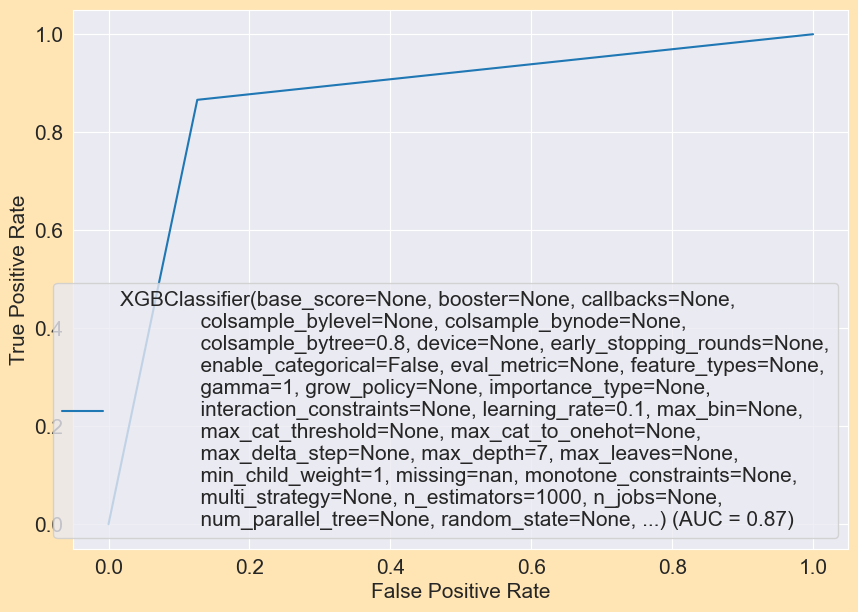

In [118]:
from sklearn import metrics
fpr,tpr,thresholds = metrics.roc_curve(y_test,pred)
roc_auc = metrics.auc(fpr,tpr)
display = metrics.RocCurveDisplay(fpr = fpr,tpr=tpr,roc_auc = roc_auc,estimator_name = final_model)
display.plot()

# In this case, the AUC is 0.87, which is considered good. This means the classifier does a good job distinguishing between the positive and negative classes.

In [119]:
#Saving the model
import pickle
filename = 'bmp.pkl'
pickle.dump(final_model,open(filename,'wb'))

In [120]:
import pickle
loaded_model = pickle.load(open('bmp.pkl','rb'))
prediction = loaded_model.predict(x_test)
prediction

array([0, 0, 0, ..., 1, 1, 1])

In [121]:
a = np.array(y_test)
df = pd.DataFrame()
df['Predicted'] = prediction
df['Original'] = a
df

,Predicted,Original
0,0,0
1,0,0
2,0,0
3,0,0
4,1,1
...,...,...
3713,0,0
3714,1,0
3715,1,1
3716,1,1


In [159]:
x_test1 = pd.read_csv('C:\\Users\\Oscar Jacob\\termdeposit_test.csv')
x_test1

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success


In [160]:
column1 = x_test1[['ID','balance','education','pdays','contact']]
x_test2 = x_test1.drop(columns = ['ID','balance','education','pdays','contact'],axis = 1)

In [161]:
column1

,ID,balance,education,pdays,contact
0,38441,118,secondary,-1,cellular
1,40403,2787,primary,-1,telephone
2,3709,144,tertiary,-1,unknown
3,37422,3777,primary,-1,telephone
4,12527,-705,secondary,-1,unknown
...,...,...,...,...,...
13559,23465,45,tertiary,-1,cellular
13560,11743,2281,primary,-1,unknown
13561,28292,285,primary,-1,cellular
13562,45163,464,secondary,91,cellular


In [162]:
x_test2

,age,job,marital,default,housing,loan,day,month,duration,campaign,previous,poutcome
0,32,services,married,no,yes,no,15,may,20,6,0,unknown
1,78,retired,divorced,no,no,no,1,jul,372,1,0,unknown
2,31,self-employed,single,no,yes,no,16,may,676,1,0,unknown
3,57,services,single,no,yes,no,13,may,65,2,0,unknown
4,45,blue-collar,divorced,no,no,yes,3,jul,111,1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...
13559,39,management,married,no,no,no,28,aug,148,4,0,unknown
13560,54,blue-collar,married,no,yes,no,20,jun,158,1,0,unknown
13561,35,retired,married,no,yes,no,29,jan,136,1,0,unknown
13562,29,admin.,single,no,no,no,9,nov,208,2,3,success


In [164]:
#Checking for nulls
x_test2.isnull().sum()

age         0
job         0
marital     0
default     0
housing     0
loan        0
day         0
month       0
duration    0
campaign    0
previous    0
poutcome    0
dtype: int64

In [165]:
#Encoding

from sklearn.preprocessing import LabelEncoder

lab_enc = LabelEncoder()

for col in ['job', 'marital', 'default', 'housing', 'loan', 'poutcome']:
    x_test2[col] = lab_enc.fit_transform(x_test2[col])
x_test2

,age,job,marital,default,housing,loan,day,month,duration,campaign,previous,poutcome
0,32,7,1,0,1,0,15,may,20,6,0,3
1,78,5,0,0,0,0,1,jul,372,1,0,3
2,31,6,2,0,1,0,16,may,676,1,0,3
3,57,7,2,0,1,0,13,may,65,2,0,3
4,45,1,0,0,0,1,3,jul,111,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
13559,39,4,1,0,0,0,28,aug,148,4,0,3
13560,54,1,1,0,1,0,20,jun,158,1,0,3
13561,35,5,1,0,1,0,29,jan,136,1,0,3
13562,29,0,2,0,0,0,9,nov,208,2,3,2


In [166]:
#converting datatype of month column  - %b for abbreviated form
x_test2['month'] = pd.to_datetime(x_test2['month'], format= '%b')
x_test2['month'] = x_test2['month'].dt.month
x_test2

,age,job,marital,default,housing,loan,day,month,duration,campaign,previous,poutcome
0,32,7,1,0,1,0,15,5,20,6,0,3
1,78,5,0,0,0,0,1,7,372,1,0,3
2,31,6,2,0,1,0,16,5,676,1,0,3
3,57,7,2,0,1,0,13,5,65,2,0,3
4,45,1,0,0,0,1,3,7,111,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
13559,39,4,1,0,0,0,28,8,148,4,0,3
13560,54,1,1,0,1,0,20,6,158,1,0,3
13561,35,5,1,0,1,0,29,1,136,1,0,3
13562,29,0,2,0,0,0,9,11,208,2,3,2


In [167]:
#Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_test3 = pd.DataFrame(scaler.fit_transform(x_test2),columns = x_test2.columns)
x_test3

,age,job,marital,default,housing,loan,day,month,duration,campaign,previous,poutcome
0,-0.838114,0.807551,-0.276592,-0.131336,0.893033,-0.429564,-0.089124,-0.472404,-0.921849,1.058702,-0.297500,0.452163
1,3.499987,0.196760,-1.914173,-0.131336,-1.119779,-0.429564,-1.778340,0.356694,0.439963,-0.574850,-0.297500,0.452163
2,-0.932421,0.502156,1.360988,-0.131336,0.893033,-0.429564,0.031534,-0.472404,1.616074,-0.574850,-0.297500,0.452163
3,1.519549,0.807551,1.360988,-0.131336,0.893033,-0.429564,-0.330440,-0.472404,-0.747754,-0.248140,-0.297500,0.452163
4,0.387871,-1.024823,-1.914173,-0.131336,-1.119779,2.327941,-1.537023,0.356694,-0.569789,-0.574850,-0.297500,0.452163
...,...,...,...,...,...,...,...,...,...,...,...,...
13559,-0.177969,-0.108636,-0.276592,-0.131336,-1.119779,-0.429564,1.479434,0.771244,-0.426644,0.405281,-0.297500,0.452163
13560,1.236630,-1.024823,-0.276592,-0.131336,0.893033,-0.429564,0.514168,-0.057855,-0.387957,-0.574850,-0.297500,0.452163
13561,-0.555195,0.196760,-0.276592,-0.131336,0.893033,-0.429564,1.600092,-2.130601,-0.473070,-0.574850,-0.297500,0.452163
13562,-1.121034,-1.330219,1.360988,-0.131336,-1.119779,-0.429564,-0.813073,2.014891,-0.194517,-0.248140,1.203911,-0.542830


In [168]:
import pickle
loaded_model = pickle.load(open('bmp.pkl','rb'))
prediction = loaded_model.predict(x_test3)
prediction

array([1, 1, 1, ..., 1, 1, 1])

In [170]:
x_test4 = x_test1.copy()
x_test4['subscribed'] = prediction
x_test4

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown,1
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown,1
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown,1
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown,1
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown,1
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown,1
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown,1
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success,1
